This is work of Alina Dzemiantsevich ademencevich@gmail.com

## Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


### Data description
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

Data for 2016 may be incomplete.

### Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import floor, ceil
from functools import reduce

#games = pd.read_csv('/datasets/games.csv')
games = pd.read_csv('games.csv')

In [2]:
#let's take a look how data set is look like
games

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [3]:
#look on general information of dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

### Conclusion

From studying of the general information of this dataset I can conclude:
- We have dataset with 10 columns
- At first glance we can see that we have missing values. The max number of rows is 16715, in many columns we have less number of rows. 
- Columns Critic_Score and Rating have the smallest number of entries
- Columns Platform, NA_sales, EU_sales, JP_sales look like these columns don't have missing values.
- Column Year_of_Release contain data of float type, I think it would be better if data type was int64


- We can see also that min year of release a video game in our dataset is 1980, when the max one is 2016
- We have zero values in each column with data of sales
- The min critic score value is 13, when the max one is 98

### Step 2. Prepare the data

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
- Explain why you filled in the missing values as you did or why you decided to leave them blank.
- Why do you think the values are missing? Give possible reasons.
- Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

**Replace the column names (make them lowercase).**

In [5]:
games.columns= games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

**Convert the data to the required types.
Describe the columns where the data types have been changed and why.**

In [7]:
#Let's convert year_of_release column into int
#to not have ending .0 of each year
#and to save more memory space

games['year_of_release'] = games['year_of_release'].astype('Int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [8]:
games.sample()

name platform  year_of_release  \
9337  Suikoden: Tsumugareshi Hyakunen no Toki      PSP             2012   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
9337  Role-Playing       0.0       0.0      0.13          0.0           NaN   

     user_score rating  
9337        NaN    NaN

In info method we see that column 'user_score' has the object type. Let's look on it. Usually scores means numbers, not strings.

In [9]:
games[games['user_score'].notnull()]

name platform  year_of_release       genre  \
0                         Wii Sports      Wii             2006      Sports   
2                     Mario Kart Wii      Wii             2008      Racing   
3                  Wii Sports Resort      Wii             2009      Sports   
6              New Super Mario Bros.       DS             2006    Platform   
7                           Wii Play      Wii             2006        Misc   
...                              ...      ...              ...         ...   
16698               Mega Brain Boost       DS             2008      Puzzle   
16702        STORM: Frontline Nation       PC             2011    Strategy   
16704                       Plushees       DS             2008  Simulation   
16705                        15 Days       PC             2009   Adventure   
16706  Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
6         11.28      9.14      6.50         2.88          89.0        8.5   
7         13.96      9.18      2.93         2.84          58.0        6.6   
...         ...       ...       ...          ...           ...        ...   
16698      0.01      0.00      0.00         0.00          48.0        tbd   
16702      0.00      0.01      0.00         0.00          60.0        7.2   
16704      0.01      0.00      0.00         0.00           NaN        tbd   
16705      0.00      0.01      0.00         0.00          63.0        5.8   
16706      0.01      0.00      0.00         0.00           NaN        tbd   

      rating  
0          E  
2          E  
3          E  
6          E  
7          E  
...      ...  
16698      E  
16702   E10+  
16704      E  
16705    NaN  
16706      T  

[10014 rows x 11 columns]

In [10]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

We have at least some strange score 'tbd'. 

From the description of task we know, that the abbreviation TBD means "to be determined".

Such these values means to be determined I would turn it into NaNs. After that I can convert the column into float type.

In [11]:
#replace 'tbd' with 'NaN'
games.loc[(games['user_score'] == 'tbd'),'user_score'] = 'NaN'

In [12]:
#we see that now we have 2394 NaNs instead of 'tbd'
games['user_score'].value_counts()

NaN    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [13]:
#convert the column into float type
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


I converted user_score column from the object type into float. To do that I replaced 'tbd - to be determined' entries to NaNs. 

Now we don't have columns to be converted into different type.

### Missing Values

**If necessary, decide how to deal with missing values:
Explain why you filled in the missing values as you did or why you decided to leave them blank.
Why do you think the values are missing? Give possible reasons.**

Let's check how many missing values we have

In [14]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

We see that we have NaNs and missing values in many columns.

And also we don't have to fill zeroes in columns with sales. Sales can be zero.

Let's start working with the first column of the table with names of the games where we have two rows with NaNs.

In [15]:
#Let's look on this rows with NaN
games[games['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

I don't think that we can fill these NaNs, so I will delete it. This is only two rows, so it's ok. 

We also can see that 2 NaNs from genre column also are here. So now we delete it with rows and don't have to deal with it further.

In [16]:
games.drop(games[games['name'].isnull()].index, inplace=True)

#now we don't have NaNs in 'name' column
games[games['name'].isnull()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Let's check the next column with NaNs - year_of_release.

In [17]:
#we have 269 missing values in 'year_of_release' column
sum(games['year_of_release'].isnull())

269

In [18]:
#let's look on it
games[games['year_of_release'].isnull()]

name platform  year_of_release  \
183                      Madden NFL 2004      PS2             <NA>   
377                     FIFA Soccer 2004      PS2             <NA>   
456           LEGO Batman: The Videogame      Wii             <NA>   
475           wwe Smackdown vs. Raw 2006      PS2             <NA>   
609                       Space Invaders     2600             <NA>   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP             <NA>   
16405                      Freaky Flyers       GC             <NA>   
16448                          Inversion       PC             <NA>   
16458        Hakuouki: Shinsengumi Kitan      PS3             <NA>   
16522                       Virtua Quest       GC             <NA>   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

       user_score rating  
183           8.5      E  
377           6.4      E  
456           7.9   E10+  
475           NaN    NaN  
609           NaN    NaN  
...           ...    ...  
16373         NaN   E10+  
16405         6.5      T  
16448         6.7      M  
16458         NaN    NaN  
16522         5.5      T  

[269 rows x 11 columns]

In [19]:
#We see that sometimes we can find actual year for the game
games[games['name']=='Madden NFL 2004']

name platform  year_of_release   genre  na_sales  eu_sales  \
183   Madden NFL 2004      PS2             <NA>  Sports      4.26      0.26   
1881  Madden NFL 2004       XB             2003  Sports      1.02      0.02   
3889  Madden NFL 2004       GC             2003  Sports      0.40      0.10   
5708  Madden NFL 2004      GBA             2003  Sports      0.22      0.08   

      jp_sales  other_sales  critic_score  user_score rating  
183       0.01         0.71          94.0         8.5      E  
1881      0.00         0.05          92.0         8.3      E  
3889      0.00         0.01          94.0         7.7      E  
5708      0.00         0.01          70.0         6.6      E

In [20]:
#sometimes we can't find it
games[games['name']=='Virtua Quest']

name platform  year_of_release         genre  na_sales  \
15754  Virtua Quest      PS2             <NA>  Role-Playing      0.01   
16522  Virtua Quest       GC             <NA>  Role-Playing      0.01   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  
15754      0.01       0.0          0.0          53.0         7.6      T  
16522      0.00       0.0          0.0          55.0         5.5      T

In [24]:
games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16444.000000  16713.000000  16713.000000  16713.000000   
mean       2006.486256      0.263302      0.145045      0.077625   
std           5.875525      0.813565      0.503359      0.308871   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score   user_score  
count  16713.000000   8137.000000  7590.000000  
mean       0.047343     68.967679     7.125046  
std        0.186742     13.938165     1.500006  
min        0.000000     13.000000     0.000000  
25%        0.000000     60.000000     6.400000  
50%        0.010000     71.000000     7.500000  
75%        0.030000     79.000000     8.200000  
max       10.570000     98.000000     9.700000

In [40]:
#let's build a pivot table for each game name with min and average year of release
games['year_of_release'] = games['year_of_release'].astype(np.float64)
game_year = games.pivot_table(index='name',values='year_of_release',aggfunc=['min','mean'])

#I think most of cases the year of first release will be the same as the average year of release
game_year

min            mean
                             year_of_release year_of_release
name                                                        
 Beyblade Burst                       2016.0          2016.0
 Fire Emblem Fates                    2015.0          2015.0
 Frozen: Olaf's Quest                 2013.0          2013.0
 Haikyu!! Cross Team Match!           2016.0          2016.0
 Tales of Xillia 2                    2012.0          2012.0
...                                      ...             ...
thinkSMART FAMILY!                    2010.0          2010.0
thinkSMART: Chess for Kids            2011.0          2011.0
uDraw Studio                          2010.0          2010.0
uDraw Studio: Instant Artist          2011.0          2011.0
¡Shin Chan Flipa en colores!          2007.0          2007.0

[11426 rows x 2 columns]

I would use the min year of release from the pivot table to fill the missing values in year_of_release where it will be possible.

In [41]:
#rewrite the pivot table, left only min value in it
game_year = games.pivot_table(index='name',values='year_of_release',aggfunc='min')
#reset the index
game_year.reset_index(inplace=True)
game_year

name  year_of_release
0                    Beyblade Burst           2016.0
1                 Fire Emblem Fates           2015.0
2              Frozen: Olaf's Quest           2013.0
3        Haikyu!! Cross Team Match!           2016.0
4                 Tales of Xillia 2           2012.0
...                             ...              ...
11421            thinkSMART FAMILY!           2010.0
11422    thinkSMART: Chess for Kids           2011.0
11423                  uDraw Studio           2010.0
11424  uDraw Studio: Instant Artist           2011.0
11425  ¡Shin Chan Flipa en colores!           2007.0

[11426 rows x 2 columns]

In [42]:
#add a new column into games table with min year of release from pivot table
games = pd.merge(games, game_year,how='left', on='name',suffixes=('_original', '_avg'))
games.head()

name platform  year_of_release_original         genre  \
0                Wii Sports      Wii                    2006.0        Sports   
1         Super Mario Bros.      NES                    1985.0      Platform   
2            Mario Kart Wii      Wii                    2008.0        Racing   
3         Wii Sports Resort      Wii                    2009.0        Sports   
4  Pokemon Red/Pokemon Blue       GB                    1996.0  Role-Playing   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45          76.0         8.0      E   
1     29.08      3.58      6.81         0.77           NaN         NaN    NaN   
2     15.68     12.76      3.79         3.29          82.0         8.3      E   
3     15.61     10.93      3.28         2.95          80.0         8.0      E   
4     11.27      8.89     10.22         1.00           NaN         NaN    NaN   

   year_of_release_avg  
0               2006.0  
1               1985.0  
2               2008.0  
3               2009.0  
4               1996.0

In [43]:
#Now we can use 'year_of_release_avg' to fill the missing values in 'year_of_release_original' column
games['year_of_release_original'] = games['year_of_release_original'].where(games['year_of_release_original'].notnull(),games['year_of_release_avg'])

#But even after that we will have 146 NaNs
games[games['year_of_release_original'].isnull()]

name platform  \
475                  wwe Smackdown vs. Raw 2006      PS2   
627                                   Rock Band     X360   
657    Frogger's Adventures: Temple of the Frog      GBA   
804                                   Rock Band      Wii   
1141                                  Rock Band      PS3   
...                                         ...      ...   
16275           Homeworld Remastered Collection       PC   
16286                                    Shorts       DS   
16346              Agarest Senki: Re-appearance      PS3   
16456               Hakuouki: Shinsengumi Kitan      PS3   
16520                              Virtua Quest       GC   

       year_of_release_original         genre  na_sales  eu_sales  jp_sales  \
475                         NaN      Fighting      1.57      1.02      0.00   
627                         NaN          Misc      1.93      0.33      0.00   
657                         NaN     Adventure      2.15      0.18      0.00   
804                         NaN          Misc      1.33      0.56      0.00   
1141                        NaN          Misc      0.99      0.41      0.00   
...                         ...           ...       ...       ...       ...   
16275                       NaN      Strategy      0.00      0.01      0.00   
16286                       NaN      Platform      0.01      0.00      0.00   
16346                       NaN  Role-Playing      0.00      0.00      0.01   
16456                       NaN     Adventure      0.01      0.00      0.00   
16520                       NaN  Role-Playing      0.01      0.00      0.00   

       other_sales  critic_score  user_score rating  year_of_release_avg  
475           0.41           NaN         NaN    NaN                  NaN  
627           0.21          92.0         8.2      T                  NaN  
657           0.07          73.0         NaN      E                  NaN  
804           0.20          80.0         6.3      T                  NaN  
1141          0.22          92.0         8.4      T                  NaN  
...            ...           ...         ...    ...                  ...  
16275         0.00          86.0         8.2   E10+                  NaN  
16286         0.00           NaN         NaN   E10+                  NaN  
16346         0.00           NaN         NaN    NaN                  NaN  
16456         0.00           NaN         NaN    NaN                  NaN  
16520         0.00          55.0         5.5      T                  NaN  

[146 rows x 12 columns]

In [44]:
#So I will drop these 146 rows with NaNS 
games.drop(games[games['year_of_release_original'].isnull()].index, inplace=True)

#also drop 'year_of_release_avg' column
games.drop(columns='year_of_release_avg',inplace=True)

#and replace the name of 'year_of_release_original' column to year_of_release
games.rename(columns={'year_of_release_original': 'year_of_release'}, inplace=True)

games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN

In [45]:
#now we don't have missing values in 'year_of_release' column
games[games['year_of_release'].isnull()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [46]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


So now we don't have missing values in 'year_of_release' column.

We had 16713 rows, now minus 146 (0,9% of data), we have 16567 rows.

Let's check 'critic_score' column now.

In [47]:
games[games['critic_score'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16708  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16709               LMA Manager 2007     X360           2006.0        Sports   
16710        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16711               Spirits & Spells      GBA           2003.0      Platform   
16712            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16708      0.00      0.00      0.01         0.00           NaN         NaN   
16709      0.00      0.01      0.00         0.00           NaN         NaN   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.01      0.00      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16708    NaN  
16709    NaN  
16710    NaN  
16711    NaN  
16712    NaN  

[8492 rows x 11 columns]

In column 'critic_score' we have 8492 rows with missing values, which is more than half of dataset or 51,25% of it.

In [48]:
#let's look on descriptive statistics for the 'critic_score' column
games['critic_score'].describe()

count    8075.000000
mean       68.991950
std        13.923383
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

I will fill the missing values of 'critic_score' column, but I also will leave the original column to compare influence of this factor with missing values and without them on sales in further analysis.  

To fill the missing values let's build the pivot table with average critic score for each game.

In [49]:
score = games.pivot_table(index='name',values='critic_score',aggfunc='mean')
#reset the index
score.reset_index(inplace=True)
score

name  critic_score
0                Tales of Xillia 2          71.0
1          .hack//Infection Part 1          75.0
2           .hack//Mutation Part 2          76.0
3           .hack//Outbreak Part 3          70.0
4                       007 Racing          51.0
...                            ...           ...
5029          inFAMOUS: Second Son          80.0
5030                        nail'd          65.0
5031     pro evolution soccer 2011          77.4
5032                  uDraw Studio          71.0
5033  uDraw Studio: Instant Artist          54.0

[5034 rows x 2 columns]

In [50]:
#add average score for each game in games table
games = pd.merge(games, score,how='left', on='name',suffixes=('_original', '_avg'))
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score_original  user_score rating  \
0     28.96      3.77         8.45                   76.0         8.0      E   
1      3.58      6.81         0.77                    NaN         NaN    NaN   
2     12.76      3.79         3.29                   82.0         8.3      E   
3     10.93      3.28         2.95                   80.0         8.0      E   
4      8.89     10.22         1.00                    NaN         NaN    NaN   

   critic_score_avg  
0              76.0  
1               NaN  
2              82.0  
3              80.0  
4               NaN

In [51]:
len(games[games['critic_score_avg'].isnull()])

7532

In 'critic_score' column we have 8492 rows with missing values, in new column with average values of critic score for each game we have 7532 rows with missing values. 

So 7532 do not have critic scores, maybe it some unpopular or unknown games so they didn't get the critic scores.
With the help of average values of critic scores column I will fill 960 rows where we have data, it's better than nothing. 

The other 7532 rows with missing values I will fill with average critic score for the whole column 'critic_score'.

I will left the original column with NaNs 'critic_score' and create a new one 'critic_score_filled' to be able to compare data on further steps.

In [52]:
#replace the name of 'critic_score_original' column to critic_score
games.rename(columns={'critic_score_original': 'critic_score'}, inplace=True)

#let's create copy of original column
games['critic_score_filled'] = games['critic_score']

#fill 960 rows with average critic score values for each game from games['critic_score_avg'] column
games['critic_score_filled'] = games['critic_score_filled'].where(games['critic_score_filled'].notnull(),games['critic_score_avg']) 

#let's check what we got
#we should have now 7532 rows with missing values in games['critic_score_filled'] column
len(games[games['critic_score_filled'].isnull()])

7532

In [53]:
#ok, we can get rid of 'critic_score_avg' column
games.drop(columns='critic_score_avg',inplace=True)

#count the average and the median value for critic_score column
average_cr_score = games['critic_score'].mean()
median_cr_score = games['critic_score'].median()

In [54]:
print('average',average_cr_score)
print('median',median_cr_score)

average 68.99195046439628
median 71.0


I will choose the median critic score value to fill the missing values - it is very close to the mean value (which tells us that dataset notmally distributed) and median value less messy.

In [55]:
#and fill the missing values of 'critic_score_filled' column with this average 
games['critic_score_filled'].fillna(median_cr_score,inplace=True)

In [56]:
len(games[games['critic_score_filled'].isnull()])

0

In [57]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16567 non-null  object 
 1   platform             16567 non-null  object 
 2   year_of_release      16567 non-null  float64
 3   genre                16567 non-null  object 
 4   na_sales             16567 non-null  float64
 5   eu_sales             16567 non-null  float64
 6   jp_sales             16567 non-null  float64
 7   other_sales          16567 non-null  float64
 8   critic_score         8075 non-null   float64
 9   user_score           7540 non-null   float64
 10  rating               9868 non-null   object 
 11  critic_score_filled  16567 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


Now we don't have missing values in 'critic_score_filled', at the same time we kept original 'critic_score' column with NaNs.

Let's proceed now with 'user_score' column.

In [58]:
games[games['user_score'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16562  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16563               LMA Manager 2007     X360           2006.0        Sports   
16564        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16565               Spirits & Spells      GBA           2003.0      Platform   
16566            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16562      0.00      0.00      0.01         0.00           NaN         NaN   
16563      0.00      0.01      0.00         0.00           NaN         NaN   
16564      0.00      0.00      0.01         0.00           NaN         NaN   
16565      0.01      0.00      0.00         0.00           NaN         NaN   
16566      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  critic_score_filled  
1        NaN                 71.0  
4        NaN                 71.0  
5        NaN                 71.0  
9        NaN                 71.0  
10       NaN                 71.0  
...      ...                  ...  
16562    NaN                 71.0  
16563    NaN                 71.0  
16564    NaN                 71.0  
16565    NaN                 71.0  
16566    NaN                 71.0  

[9027 rows x 12 columns]

In user_score column we have 9027 rows with missing values or 54% of data. 

I will try to apply the method I used before to fill the missing values: 
- 1) Build the pivot table with average user scores for each game
- 2) Use these average scores to fill the NaNs
- 3) If we still have NaNs (I'm more than sure we will have) - fill the NaNs with average user score for the whole column
- 4) And also I will left the original column 'user_score' with NaNs for further analysis

In [59]:
score = games.pivot_table(index='name',values='user_score',aggfunc='mean')
#reset the index
score.reset_index(inplace=True)
score

name  user_score
0                Tales of Xillia 2        7.90
1          .hack//Infection Part 1        8.50
2           .hack//Mutation Part 2        8.90
3           .hack//Outbreak Part 3        8.70
4                       007 Racing        4.60
...                            ...         ...
4650                    inFAMOUS 2        8.40
4651          inFAMOUS: Second Son        7.90
4652                        nail'd        6.65
4653     pro evolution soccer 2011        6.12
4654  uDraw Studio: Instant Artist        5.70

[4655 rows x 2 columns]

We see that in pivot table we have only 4655 rows, so it might be that after merging the tables and filling the NaNs in 'user_score' table, we will still have there NaNs. 

In [60]:
#add average user score for each game in games table
games = pd.merge(games,score,how='left', on='name',suffixes=('_original', '_avg'))
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score_original rating  \
0     28.96      3.77         8.45          76.0                  8.0      E   
1      3.58      6.81         0.77           NaN                  NaN    NaN   
2     12.76      3.79         3.29          82.0                  8.3      E   
3     10.93      3.28         2.95          80.0                  8.0      E   
4      8.89     10.22         1.00           NaN                  NaN    NaN   

   critic_score_filled  user_score_avg  
0                 76.0             8.0  
1                 71.0             NaN  
2                 82.0             8.3  
3                 80.0             8.0  
4                 71.0             NaN

In [61]:
#With the help of user_score_avg column we can fill 9027 - 7928 = 1099 rows
len(games[games['user_score_avg'].isnull()])

7928

In [62]:
#replace the name of 'user_score_original' column to user_score
games.rename(columns={'user_score_original': 'user_score'}, inplace=True)

#let's create copy of original column
games['user_score_filled'] = games['user_score']

#fill 1099 rows with average user score values for each game from games['user_score_avg'] column
games['user_score_filled'] = games['user_score_filled'].where(games['user_score_filled'].notnull(),games['user_score_avg']) 

#let's check what we got
#we should have now 7928 rows with missing values in games['critic_score_filled'] column
len(games[games['user_score_filled'].isnull()])

7928

In [63]:
#ok, we can get rid of 'user_score_avg' column
games.drop(columns='user_score_avg',inplace=True)

#count the average and median value for critic_score column
average_user_score = games['user_score'].mean()
median_user_score = games['user_score'].median()

In [64]:
print('average',average_user_score)
print('median',median_user_score)

average 7.125026525198988
median 7.5


Here I also will use the median value to fill the NaNs. And also I can say that average and median values quite close to each other, so looks like the dataset is normally distributed.

In [65]:
#and fill the missing values of 'user_score_filled' column with this average 
games['user_score_filled'].fillna(median_user_score,inplace=True)

len(games[games['user_score_filled'].isnull()])

0

In [66]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16567 non-null  object 
 1   platform             16567 non-null  object 
 2   year_of_release      16567 non-null  float64
 3   genre                16567 non-null  object 
 4   na_sales             16567 non-null  float64
 5   eu_sales             16567 non-null  float64
 6   jp_sales             16567 non-null  float64
 7   other_sales          16567 non-null  float64
 8   critic_score         8075 non-null   float64
 9   user_score           7540 non-null   float64
 10  rating               9868 non-null   object 
 11  critic_score_filled  16567 non-null  float64
 12  user_score_filled    16567 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.8+ MB


Now we see that we don't have NaNs in 'user_score_filled' column.

Let's check the kast column with NaNs - 'rating' column.

In [67]:
len(games[games['rating'].isnull()])

6699

We have 6699 rows with missing values in 'rating' column. It is 40% of data. Let's see which values we have in column 'rating'.

In [68]:
games['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

What I found about these ratings:
- E means "Everyone"
- T means "Teen" game have content that may be suitable for ages 13 and older.
- M means "Mature" have content that may be suitable for persons ages 17 and older. 
- E10+ means "Everyone 10+" rating indicates the content is generally suitable for ages 10 and up
- EC means "Early Childhood" have content that may be suitable for persons ages 3 and older
- K-A means "Kids to Adults" was used untill 1998, when it was renamed "Everyone".
- RP means "Rating Pending" have been submitted to the ESRB and are awaiting final rating. This symbol appears only in advertising prior to a game's release.
- AO are considered by the board to be suitable for players age 18 and over.

I will use the following approach to fill the NaNs here:
I will replace missing values with 'no rating' value. So let's replace NaN with it.

In [69]:
games['rating_filled'] = games['rating']

games['rating_filled'].fillna('no rating',inplace=True)
len(games[games['rating_filled'].isnull()])

0

In [70]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16567 non-null  object 
 1   platform             16567 non-null  object 
 2   year_of_release      16567 non-null  float64
 3   genre                16567 non-null  object 
 4   na_sales             16567 non-null  float64
 5   eu_sales             16567 non-null  float64
 6   jp_sales             16567 non-null  float64
 7   other_sales          16567 non-null  float64
 8   critic_score         8075 non-null   float64
 9   user_score           7540 non-null   float64
 10  rating               9868 non-null   object 
 11  critic_score_filled  16567 non-null  float64
 12  user_score_filled    16567 non-null  float64
 13  rating_filled        16567 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.9+ MB


Now we don't have missing values in 'rating' column. But we saw that 'K-A' rating is the same as 'E' rating.

- K-A means "Kids to Adults" was used untill 1998, when it was renamed "Everyone".

So I will replace 'K-A' with 'E' for uniformity.

In [71]:
#I will replace it in both columns 'rating' and 'rating_filled'
games.loc[(games['rating'] == 'K-A'),'rating'] = 'E'
games.loc[(games['rating_filled'] == 'K-A'),'rating_filled'] = 'E'

In [72]:
games['rating'].value_counts()

E       3961
T       2930
M       1554
E10+    1412
EC         8
RP         2
AO         1
Name: rating, dtype: int64

In [73]:
games['rating_filled'].value_counts()

no rating    6699
E            3961
T            2930
M            1554
E10+         1412
EC              8
RP              2
AO              1
Name: rating_filled, dtype: int64

So now we don't have'K-A' rating. 

**Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.**

In [74]:
#let's calculate the sum of 'na_sales', 'eu_sales', 'jp_sales' and 'other_sales' columns
games['total_sales'] = games.iloc[:,4:8].sum(axis=1)
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   critic_score_filled  user_score_filled rating_filled  total_sales  
0                 76.0                8.0             E        82.54  
1                 71.0                7.5     no rating        40.24  
2                 82.0                8.3             E        35.52  
3                 80.0                8.0             E        32.77  
4                 71.0                7.5     no rating        31.38

### Conclusion

- I replaced the column names and mad them lowercase
- I found that some columns should be converted into different data types: 
- I converted ‘year_of_release'  column from float into int to get rid of .0 ending to save more memory space
- I converted user_score column from the object type into float. To do that I replaced 'tbd - to be determined' entries to NaNs.
- I calculated the total sales

**Missing values** 

The data set contained following missing values:

- We had 2 rows with missing name in ‘name’ and 'genre' column, so I delete it such as we can’t fill this values.


- We had 269 missing entries in year of release column. For some games I could find the year of release - the dataset contain these games on different platform where in some cases year is specified and in other case - not. For those cases where I couldn't fill the missing values I decided to delete such rows. It was only 146 rows which I deleted. 


- We had 8492 rows with missing values in 'critic_score' column. It is more than half of dataset or 51,25% of it. To fill the NaNs in 'critic_score' column I calculated the average critic score value for each game and used it to fill the gaps. After that I still had NaNs so I filled it with median critic score value for the whole column.


- I left the original column with NaNs 'critic_score' and create a new one 'critic_score_filled' to be able to compare data on further steps.


- I used the same scheme on 'user_score' column where we also had NaNs. In user_score column we have 9027 rows with missing values or 54% of data. I created the new column 'user_score_filled' with filled NaNs and left the original 'user_score' column to be able to compare data on further steps.


- We have 6699 rows with missing values in 'rating' column. It is 40% of data. I replaced NaNs with "no rating". I also replaced rating "K-A" to "E" because it means the same. I left the the original column with NaNs and created a new one with filled missing values

### Step 3. Analyze the data

- **Look at how many games were released in different years. Is the data for every period significant?**

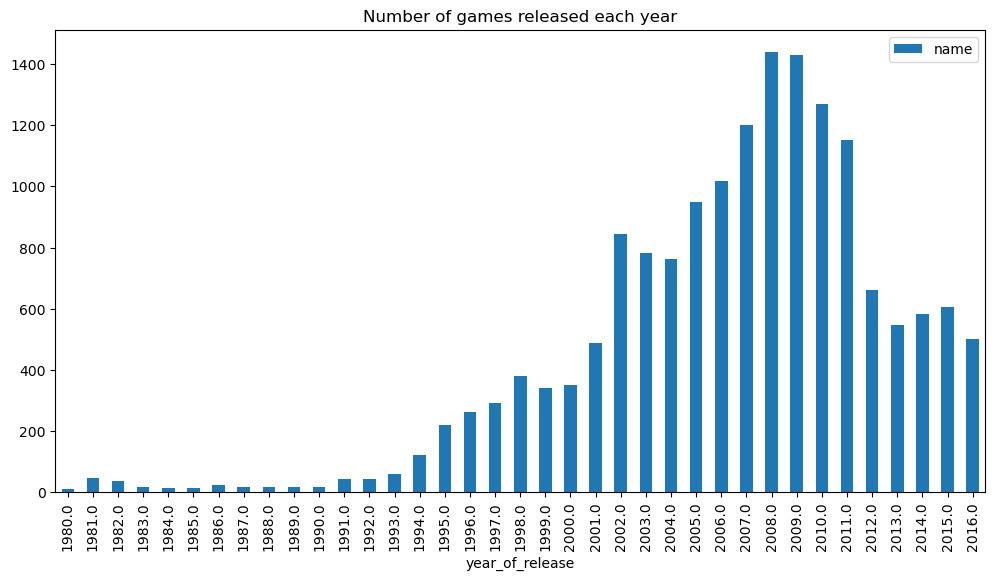

In [75]:
#let's plot the distribution graph for total number of games released in each year
num_games = games.pivot_table(index='year_of_release',values='name',aggfunc='count')
num_games.plot(kind='bar',figsize=(12,6),title='Number of games released each year')
plt.show()

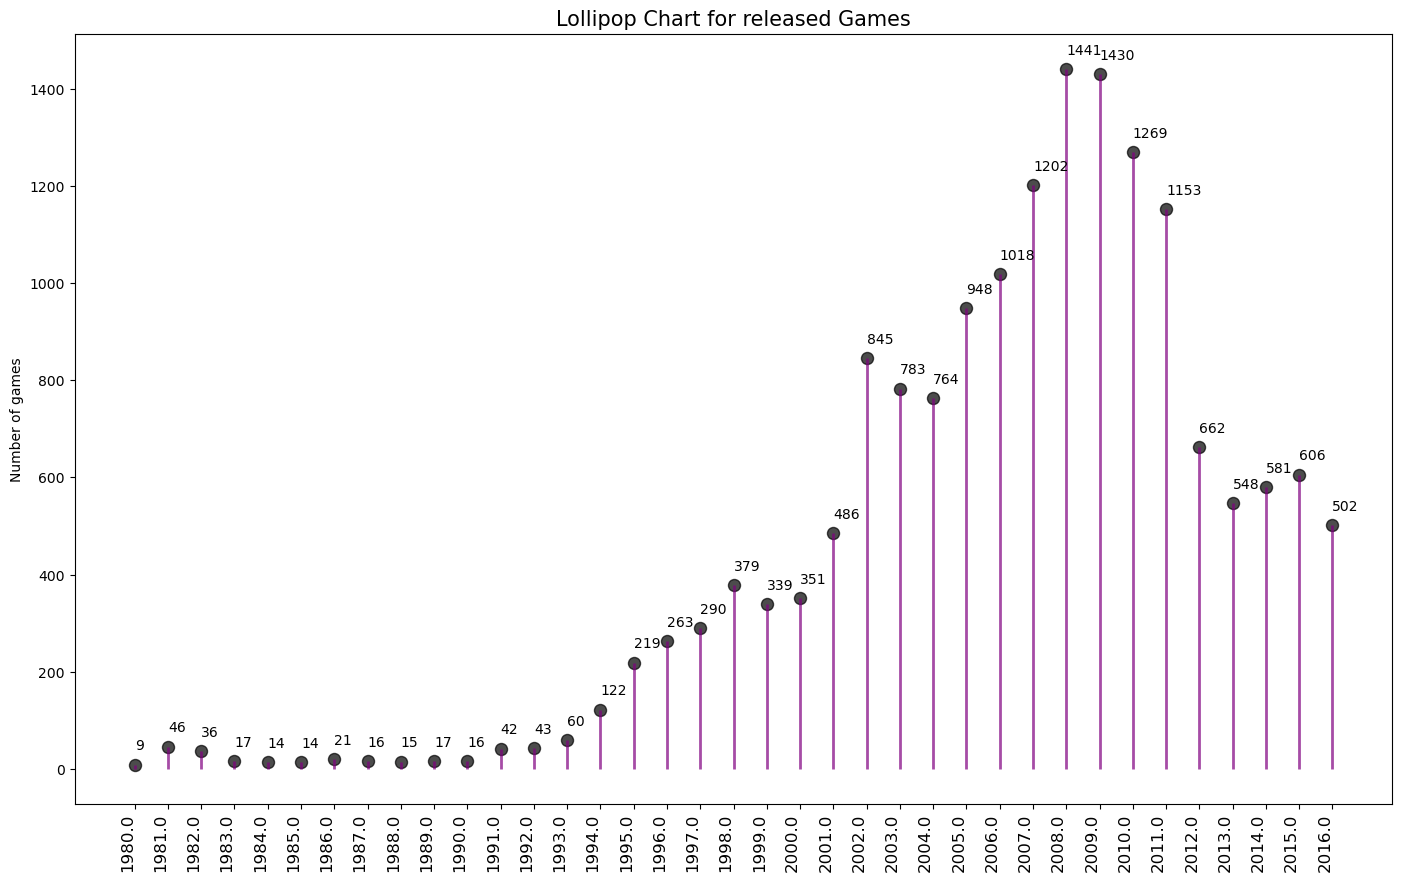

In [76]:
#let's plot the same on lolipop chart
num_games.reset_index(inplace=True)

fig,ax = plt.subplots(figsize=(17,10))
ax.vlines(x=num_games.year_of_release, ymin=0, ymax=num_games.name, color='purple',alpha=0.7,linewidth=2)
ax.scatter(x=num_games.year_of_release, y=num_games.name, s=75, color = 'black', alpha=0.7) 

ax.set_title('Lollipop Chart for released Games', fontdict={'size':15 })
ax.set_ylabel('Number of games')
ax.set_xticks(num_games.year_of_release)
ax.set_xticklabels(num_games.year_of_release, rotation=90,fontdict={'horizontalalignment': 'right', 'size':12 })

for row in num_games.itertuples():
    ax.text(row.year_of_release, row.name + 30, s=round(row.name,2))

We see that the plot of number of games released in different years is quite similar to normal distribution. 
It quite strange that number of games published from 2010 is decreasing. I think it's because our dataset do not include mobile games. So  number of video games is decreasing after 2010 while number of mobile games is rising, but with our dataset we can't check this.   

I think at least we can throw out data of video games released before 2000. The number of games proportionately to the number of games released after 2000 is there very small.

- **Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

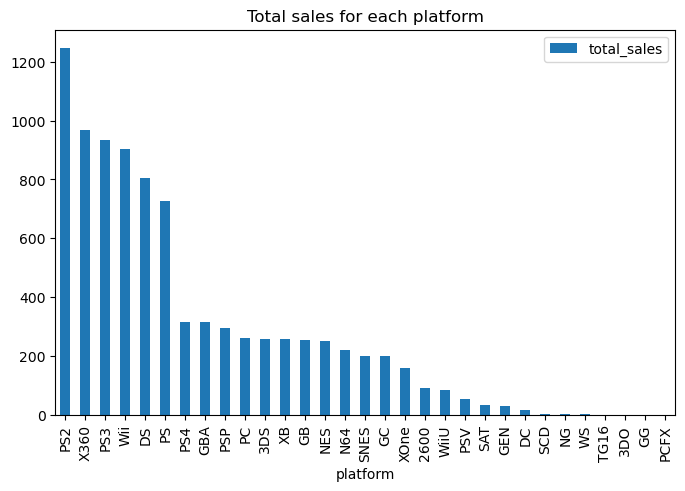

In [77]:
#let's build the pivot table with total sales for each platform
pl_sales = games.pivot_table(index='platform',values='total_sales',aggfunc='sum')
#and plot how it looks
pl_sales.sort_values('total_sales',ascending=False).plot(kind='bar',figsize=(8,5),title='Total sales for each platform')
plt.show()

In [78]:
#descriptive statistics for data of total sales for platforms
pl_sales.describe()

total_sales
count    31.000000
mean    286.115484
std     346.504606
min       0.030000
25%      22.150000
50%     200.040000
75%     303.650000
max    1247.160000

In [79]:
#platforms with the highest sales
pl_sales.sort_values('total_sales',ascending=False).head(7)

total_sales
platform             
PS2           1247.16
X360           966.61
PS3            935.19
Wii            903.31
DS             804.28
PS             727.58
PS4            314.14

In [80]:
#platforms with the lowest sales
pl_sales.sort_values('total_sales',ascending=False).tail(7)

total_sales
platform             
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03

We see that PS2 has the biggest sales among all platforms. The next goes X360, PS3, Wii, DS and PS.

At the same time platforms SCD, NG, WS, TG16, 3DO, GG and PCFX have the lowest sales.  

On a graph "Total sales for each platform" visually we can highlight three main clusters by total sales - first 6 bars with the highest sales. The middle sales - all the bars till the lowest sales. And the lowest sales - 7 last bars.

But if looking on describe statistics we see that highest sales have the platforms with total_sales more than 303.65 (4th quartile).

**Choose the platforms with the greatest total sales and build a distribution based on data for each year.**

Let's study the platforms with the highest sales. To do that I create a dataslice with platforms where total_sales more than 303.65.

In [81]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [82]:
#create a data slice with sales more than 303.65
high_sale = pl_sales.query('total_sales > 303.65')
#save sorted results
high_sale.sort_values('total_sales',ascending=False,inplace=True)
#reset index
high_sale.reset_index(inplace=True)
high_sale

platform  total_sales
0      PS2      1247.16
1     X360       966.61
2      PS3       935.19
3      Wii       903.31
4       DS       804.28
5       PS       727.58
6      PS4       314.14
7      GBA       313.73

In [83]:
#get list of platforms with highest sales
platforms = high_sale['platform']

#create a dataslice from games dataframe where will be only platforms with the highest sales
games_high_sales = games.query('platform in @platforms')

In [84]:
#new dataslice contain 10533 rows
len(games_high_sales['platform'])

10535

In [85]:
#we see how many games with highest sales of each platform we have
games_high_sales['platform'].value_counts()

PS2     2140
DS      2129
PS3     1320
Wii     1301
X360    1250
PS      1190
GBA      813
PS4      392
Name: platform, dtype: int64

We see that the biggest number of games was published on PS2 platform. And at the same time this is the platform with the highest sales.

Next platform by total sales is X360, at the same time only 1250 games were published on this platform. 

And the third platform by number of games on it and at the same by total sales is PS3.

In [86]:
#let's write a function to build the distribution graph for the platforms with the highest sales

def sales_by_year (data,platforms):
    for platform in platforms:
        print(data.query('platform == @platform')
              .pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
              .plot(kind='bar',title=platform) )
        plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


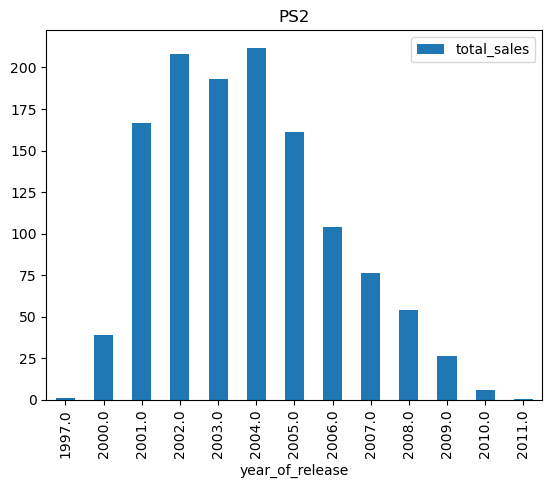

AxesSubplot(0.125,0.11;0.775x0.77)


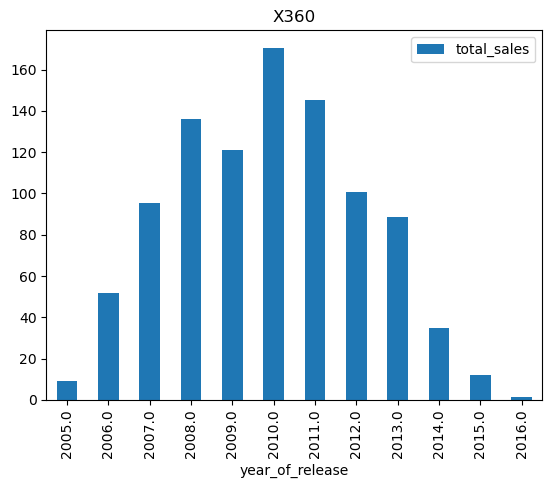

AxesSubplot(0.125,0.11;0.775x0.77)


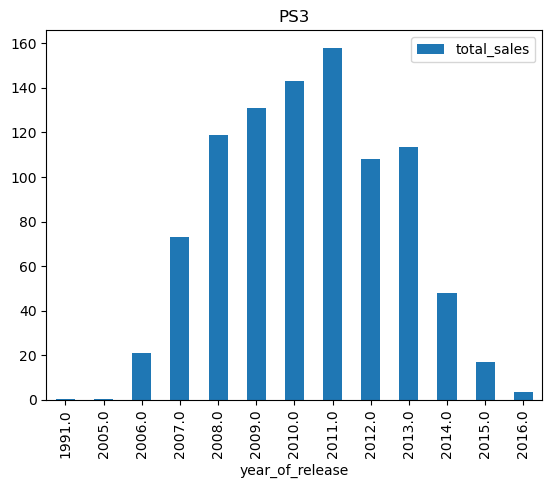

AxesSubplot(0.125,0.11;0.775x0.77)


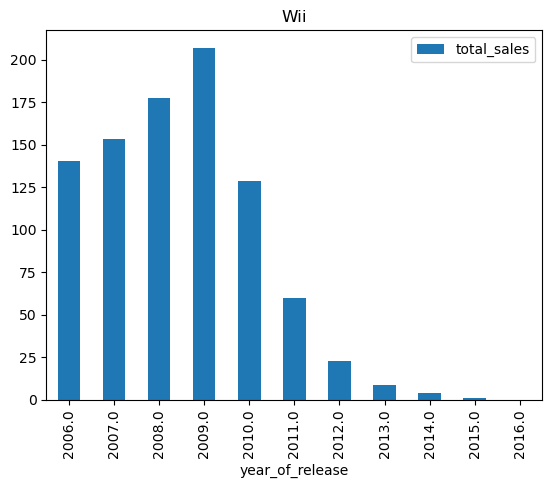

AxesSubplot(0.125,0.11;0.775x0.77)


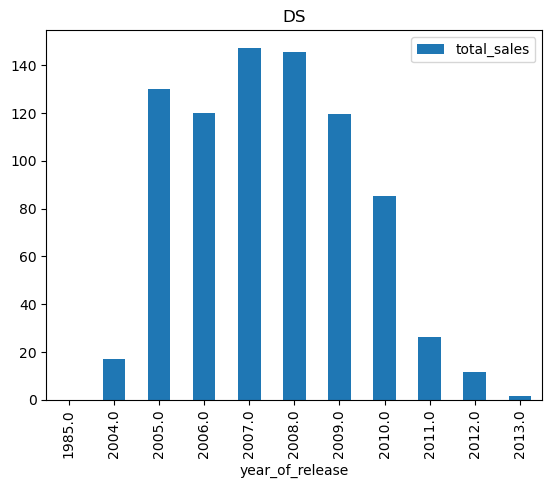

AxesSubplot(0.125,0.11;0.775x0.77)


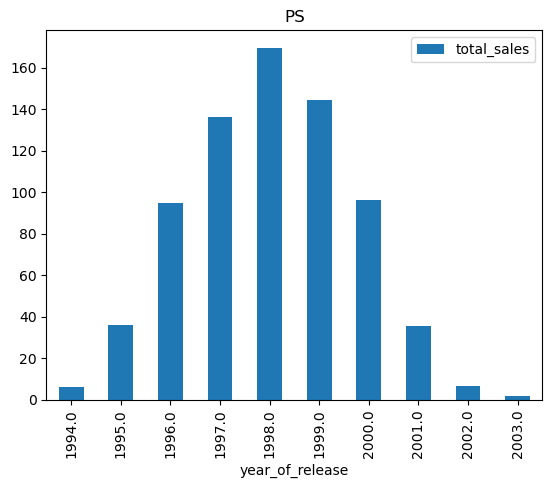

AxesSubplot(0.125,0.11;0.775x0.77)


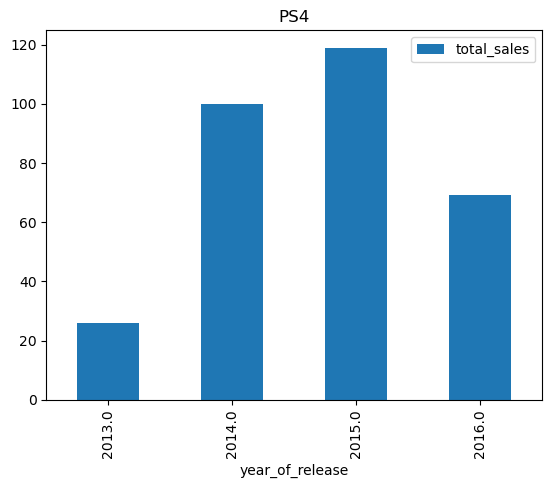

AxesSubplot(0.125,0.11;0.775x0.77)


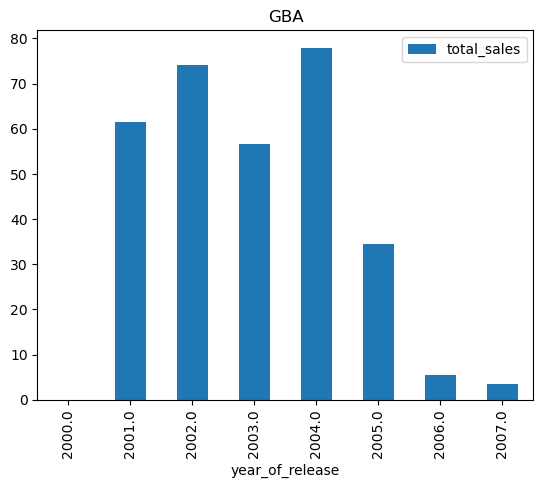

In [87]:
#list of platforms with the highest total sales
platforms = high_sale['platform']

#build the graphs
sales_by_year(games_high_sales,platforms)

Looking on the graphs I can conclude that for almost all of them total sales distributed normally. 
- Graph for PS2 platform skewed positively. 
- Graph of distribution of total sales for X360, PS3, PS and PS4 platforms look normally. 
- Graph of total sales distribution for Wii platform also skewed positively to the left, from 2006 till 2009 the sales only growing and after 2009 something happened and sales decreased drastically till they reached the zero mark. 
- Graph of total sales distribution by years for DS has some outlier in 2005 year. If we haven't such outlier graph would look very normally.
- Graph of total sales distribution for GBA platform shows the high sales in 2001-2004 years. After these years sales starting to decrease and reached the zero mark in 2008.

**Find platforms that used to be popular but now have zero sales.**

In [88]:
#build a pivot table with year of release of the first game released on a platform and the last game
pl_lifecycle = games_high_sales.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
#pl_lifecycle.reset_index(inplace=True)
pl_lifecycle.sort_values(by=('max', 'year_of_release'))

min             max
         year_of_release year_of_release
platform                                
PS                1994.0          2003.0
GBA               2000.0          2007.0
PS2               1997.0          2011.0
DS                1985.0          2013.0
PS3               1991.0          2016.0
PS4               2013.0          2016.0
Wii               2006.0          2016.0
X360              2005.0          2016.0

We see that for the most popular platforms with the higest sales, we have three platforms that used to be popular but now have zero sales: 

- The sales on PS platform stopped in 2004. Last sales were in 2003.
- The sales on GBA platform stopped in 2008. Last sales were in 2007.
- The sales on PS2 platform stopped in 2011.
- The lifecycle of DS platform lasted from 2004 till 2013. After 2013 the platform has no sales.

**Let's calculate the average lifecycle for platforms with highest total sales.**

Before calculating the average lifecycle for platforms, let's look once again on the pivot table above.
We see there some strange data that minimum year of release of the first game for PS3 platform was in 1991. It might be a mistake because the platform PS3 was released in 2005.

I will delete this entry where year_of_release for the game is 1991 from both dataframes: games and games_high_sales. Because obviusly it's a mistake.

In [89]:
#that row in games_high_sales dataframe
games_high_sales[ (games_high_sales['platform']=='PS3')].sort_values(by='year_of_release').head(1)

#and in games dataframe have the same index
#games[(games['platform']=='PS3')].sort_values(by='year_of_release').head(1)

name platform  year_of_release     genre  na_sales  \
4106  Sonic the Hedgehog      PS3           1991.0  Platform       0.0   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
4106      0.48       0.0          0.0          43.0         4.1   E10+   

      critic_score_filled  user_score_filled rating_filled  total_sales  
4106                 43.0                4.1          E10+         0.48

In [90]:
#drop the entry from both tables
games_high_sales.drop(index=4106,inplace=True)
games.drop(index=4106,inplace=True)

#now it's much better
games_high_sales[games_high_sales['platform']=='PS3']['year_of_release'].value_counts()
#games[games['platform']=='PS3']['year_of_release'].value_counts()

2011.0    219
2010.0    187
2009.0    162
2012.0    149
2008.0    139
2013.0    126
2014.0    108
2007.0     90
2015.0     73
2016.0     38
2006.0     27
2005.0      1
Name: year_of_release, dtype: int64

In [91]:
#Let's update our pivot table
pl_lifecycle = games_high_sales.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
pl_lifecycle

min             max
         year_of_release year_of_release
platform                                
DS                1985.0          2013.0
GBA               2000.0          2007.0
PS                1994.0          2003.0
PS2               1997.0          2011.0
PS3               2005.0          2016.0
PS4               2013.0          2016.0
Wii               2006.0          2016.0
X360              2005.0          2016.0

We see the same mistake with DS platform. The full name of the platform is Nintendo DS and it was released in 2004. So there is no way that was some game released on this platform in 1985. I will also drop this row with entry where year of release is 1985.

In [92]:
#this entry also have the same index in both tables games_high_sales and games

games_high_sales[ (games_high_sales['platform']=='DS')].sort_values(by='year_of_release').head(1)
#games[(games['platform']=='DS')].sort_values(by='year_of_release').head(1)

name platform  year_of_release   genre  \
15818  Strongest Tokyo University Shogi DS       DS           1985.0  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15818       0.0       0.0      0.02          0.0           NaN         NaN   

      rating  critic_score_filled  user_score_filled rating_filled  \
15818    NaN                 71.0                7.5     no rating   

       total_sales  
15818         0.02

In [93]:
#drop this entry
games_high_sales.drop(index=15818,inplace=True)
games.drop(index=15818,inplace=True)

#now it looks more like real years
games_high_sales[games_high_sales['platform']=='DS']['year_of_release'].value_counts()

2008.0    494
2009.0    404
2007.0    377
2010.0    324
2006.0    201
2011.0    155
2005.0    118
2012.0     24
2004.0     23
2013.0      8
Name: year_of_release, dtype: int64

In [94]:
#let's update our pivot table once again

pl_lifecycle = games_high_sales.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])

#count the lifecycle for each platform among the platforms with greatest sales
pl_lifecycle['lifecycle'] = pl_lifecycle[('max', 'year_of_release')] - pl_lifecycle[('min', 'year_of_release')]

pl_lifecycle

min             max lifecycle
         year_of_release year_of_release          
platform                                          
DS                2004.0          2013.0       9.0
GBA               2000.0          2007.0       7.0
PS                1994.0          2003.0       9.0
PS2               1997.0          2011.0      14.0
PS3               2005.0          2016.0      11.0
PS4               2013.0          2016.0       3.0
Wii               2006.0          2016.0      10.0
X360              2005.0          2016.0      11.0

Now we can calculate the average lifecycle for platforms with the highest sales. And it is about 9 years.

In [95]:
print('The average lifecycle for platforms with the highest sales', round(pl_lifecycle['lifecycle'].mean(),2), 'years' )

The average lifecycle for platforms with the highest sales 9.25 years


**Let's calculate the average lifecycle for all platforms.**

In [96]:
pl_lifecycle_all = games.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])

#count the lifecycle for each platform among the all platforms 
pl_lifecycle_all['lifecycle'] = pl_lifecycle_all[('max', 'year_of_release')] - pl_lifecycle_all[('min', 'year_of_release')]

print('The average lifecycle for all platforms', round(pl_lifecycle_all['lifecycle'].mean(),2), 'years' )

The average lifecycle for all platforms 7.71 years


**Let's consider PlayStation platforms lifecycle**

PlayStation platforms are the most profitable platforms, so let's consider lifecycle of these platforms.

To do so I will build four histogrmas - total sales for PS, PS2, PS3 and PS4 on one graph.
First of all let's create data slices with data for each PS platform and build on base of it a pivot tables with data of total sales for each year for each platform. 

In [97]:
#dataslice and pivot table for PS platform
PS = games_high_sales.query('platform == "PS"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
PS.reset_index(inplace=True)
PS.rename({'total_sales':'PS_total_sales'}, axis='columns',inplace=True)

#for PS2 platform
PS2 = games_high_sales.query('platform == "PS2"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
PS2.reset_index(inplace=True)
PS2.rename({'total_sales':'PS2_total_sales'}, axis='columns',inplace=True)

#for PS3 platform
PS3 = games_high_sales.query('platform == "PS3"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
PS3.reset_index(inplace=True)
PS3.rename({'total_sales':'PS3_total_sales'}, axis='columns',inplace=True)

#for PS4 platform
PS4 = games_high_sales.query('platform == "PS4"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
PS4.reset_index(inplace=True)
PS4.rename({'total_sales':'PS4_total_sales'}, axis='columns',inplace=True)

In [98]:
#let's merge these tables into one

data_frames = [PS, PS2, PS3,PS4]
result = reduce(lambda  left,right: pd.merge(left,right,on=['year_of_release'],
                                            how='outer'), data_frames)
result.fillna(0,inplace=True)
#put year of release column into ascending order
result.sort_values('year_of_release',ascending=True,inplace=True)
result.set_index('year_of_release',inplace=True)

#result

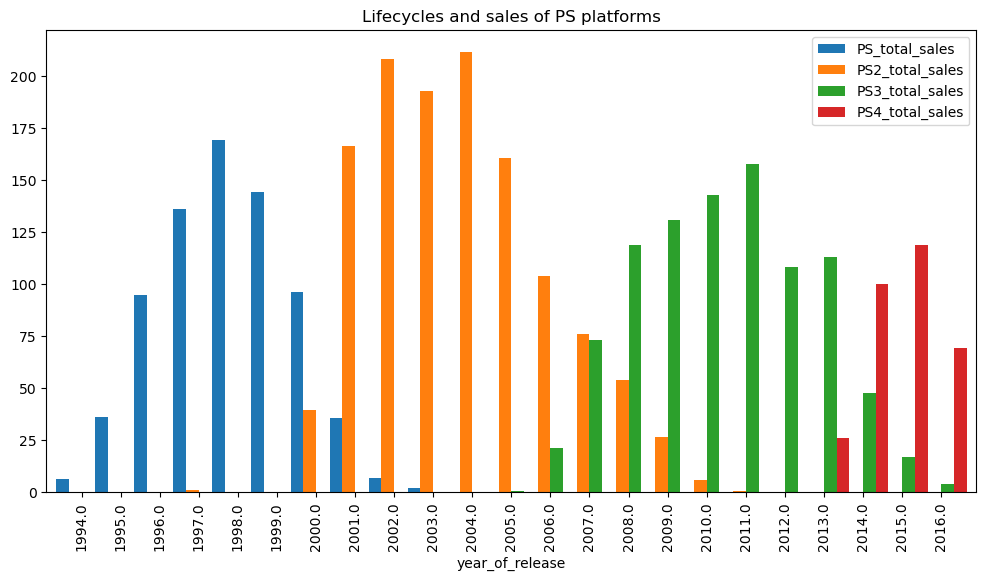

In [99]:
#Let's build three histograms on one plot
result[['PS_total_sales','PS2_total_sales','PS3_total_sales','PS4_total_sales']].plot(kind ='bar',width=1.3, figsize=(12,6),title='Lifecycles and sales of PS platforms')
plt.show()

- We see on graph that PS platform (blue) was very popular from 1996 till 2000.
- **In 2000 was released a new platform PS2.**

- PS2 platform was very popular till 2005-2006.
- Sales of PS2 decreased constanly from 2005 till they stopped in 2011.

- **In 2006 was released new platform PS3**, and it replaced the previous one - PS2.
- Sales on PS3 platform constanly grew from 2006 till 2011.
- In 2012 and 2013 sales on PS3 decreased a bit.

- **In 2013 appeared a new platform - PS4**.
- Sales of PS3 were decreasing from 2013 towards 2016.
- Sales of PS4 were growing till they reached the max value in 2015.

- **The most sucessfull platform among all was PS2.**

In [100]:
#let's count average lifecycle for these platforms

mean_lc_PS = round(((pl_lifecycle.loc['PS','lifecycle'] + 
              pl_lifecycle.loc['PS2','lifecycle'] + 
              pl_lifecycle.loc['PS3','lifecycle'] +
              pl_lifecycle.loc['PS4','lifecycle'] )/4),2)

print('The average lifecycle in years for PS platforms is',mean_lc_PS)

The average lifecycle in years for PS platforms is     9.25
dtype: float64


We see that for PS platforms the average lifecycle is 9.25 years, so it's almost the same as for other high profitable platforms.

**How long does it generally take for new platforms to appear and old ones to fade?**

Looking in a graph where three PS platforms combined, I can conclude that after appearing a new platform on a market it tooks from 3 till 5 years till the sales on old platformes stopped. And new platforms win the market in 1-2 years after appearing.

In [101]:
#Let's compare also on one plot how changed total sales for all most profitable platforms: 
high_sale

platform  total_sales
0      PS2      1247.16
1     X360       966.61
2      PS3       935.19
3      Wii       903.31
4       DS       804.28
5       PS       727.58
6      PS4       314.14
7      GBA       313.73

In [102]:
#Let's create some extra data slices for that

#create data slice for X360 platform
X360 = games_high_sales.query('platform == "X360"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
X360.reset_index(inplace=True)
X360.rename({'total_sales':'X360_total_sales'}, axis='columns',inplace=True)

#create data slice for Wii platform
Wii = games_high_sales.query('platform == "Wii"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
Wii.reset_index(inplace=True)
Wii.rename({'total_sales':'Wii_total_sales'}, axis='columns',inplace=True)

#create data slice for DS platform
DS = games_high_sales.query('platform == "DS"').pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
DS.reset_index(inplace=True)
DS.rename({'total_sales':'DS_total_sales'}, axis='columns',inplace=True)

In [103]:
#let's merge these tables into one

data_frames = [PS,PS2,PS3,PS4,X360,Wii,DS]
result_all = reduce(lambda  left,right: pd.merge(left,right,on=['year_of_release'],
                                            how='outer'), data_frames)
result_all.fillna(0,inplace=True)
#put year of release column into ascending order
result_all.sort_values('year_of_release',ascending=True,inplace=True)
result_all.set_index('year_of_release',inplace=True)

In [104]:
result_all.columns

Index(['PS_total_sales', 'PS2_total_sales', 'PS3_total_sales',
       'PS4_total_sales', 'X360_total_sales', 'Wii_total_sales',
       'DS_total_sales'],
      dtype='object')

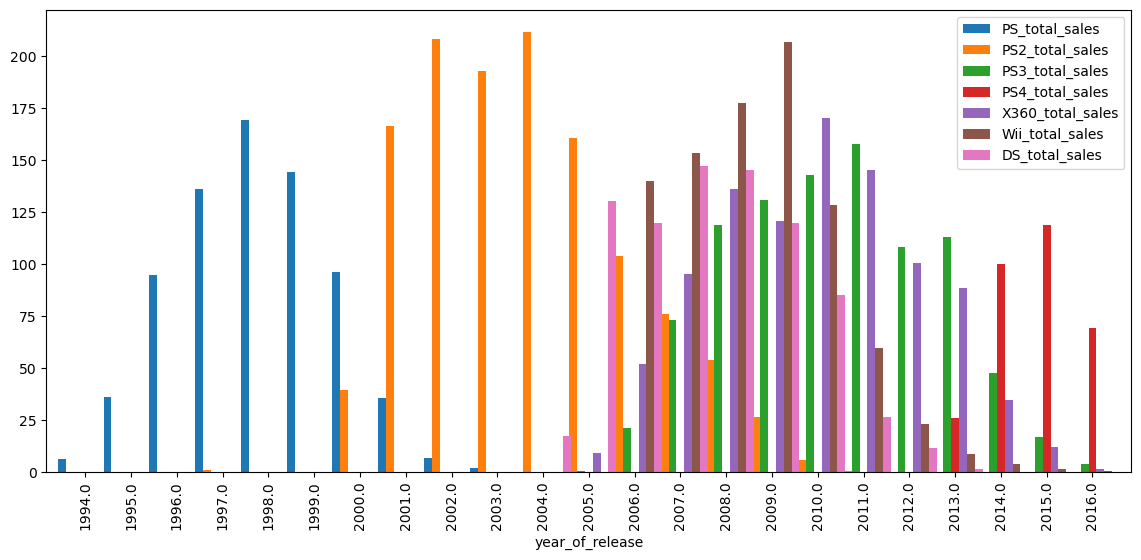

In [105]:
#Let's build three histograms on one plot
result_all[['PS_total_sales', 'PS2_total_sales', 'PS3_total_sales',
       'PS4_total_sales', 'X360_total_sales', 'Wii_total_sales',
       'DS_total_sales']].plot(kind ='bar',width=1.2, figsize=(14,6))
plt.show()

We see that this graph is quite messy.

But we can see the periods of time when platforms competed one another:
- Wii platform operated at the same time with DS platform, PS3 platform and X360 platform.
- Sales of PS2 platform decreased when appeared DS platform, Wii platform and PS3 platform.
- **Most competitive period of time (among platforms with the highest sales) - from 2005 till 2015**
- In this period of time (2005-2015) we have sales on following major platforms: Wii, DS, PS3, X360

Let's consider major platforms in pairs or max three platforms on one plot.

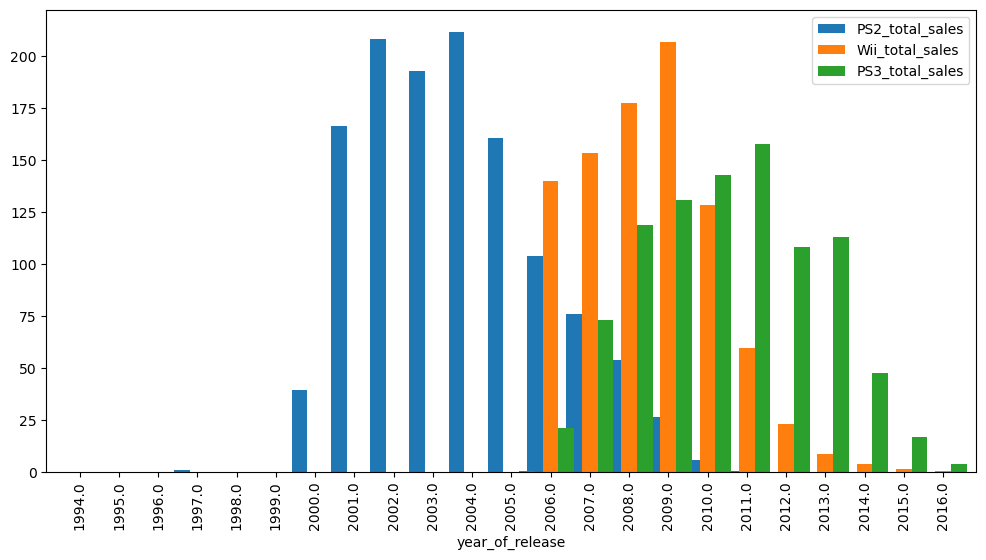

In [106]:
#Let's consider PS2, Wii and PS3
result_all[['PS2_total_sales','Wii_total_sales','PS3_total_sales']].plot(kind ='bar',width=1.2, figsize=(12,6))
plt.show()

- We see that Wii platform (orange) could be a reason why PS3 had less sales than PS2.
- Also what is quite strange: from the very beginning the Wii platform had huge sales. Sales did not rised smoothly, the sales immediately started from a high position.
- We see that for PS platforms took 1-2 years to gain high sales, and 5-6 years to stop the sales.

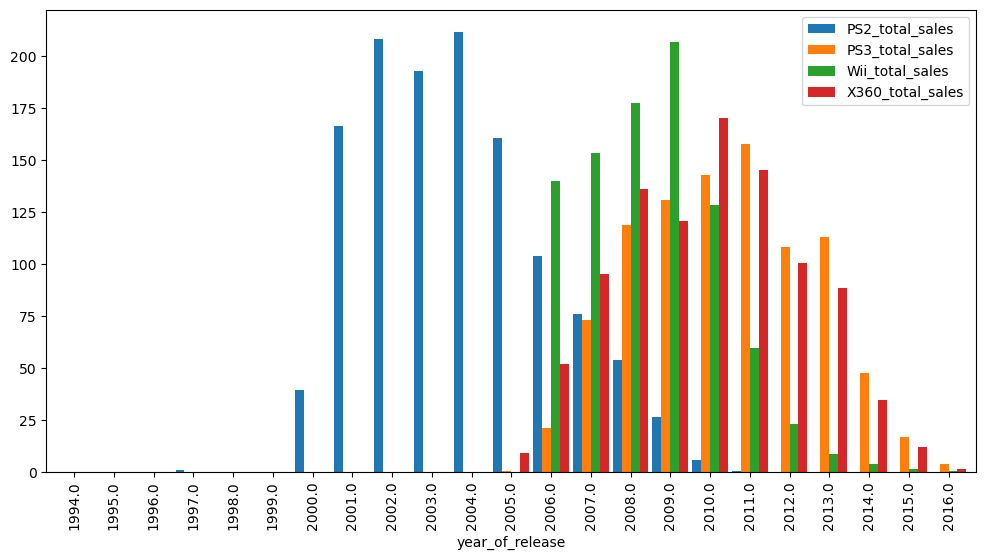

In [107]:
#Let's consider PS2, PS3, Wiia and X360
result_all[['PS2_total_sales','PS3_total_sales','Wii_total_sales', 'X360_total_sales']].plot(kind ='bar',width=0.9, figsize=(12,6))
plt.show()

- We can see here very clearly the competition of two platforms - PS3 and X360. 
- They appear and fade away almost at the same time.
- We see that the Wii platform was the most succesfull from the 2006 till 2009.
- When on the Wii platform sales started to fall, the sales on X360 and PS3 grew immediately.

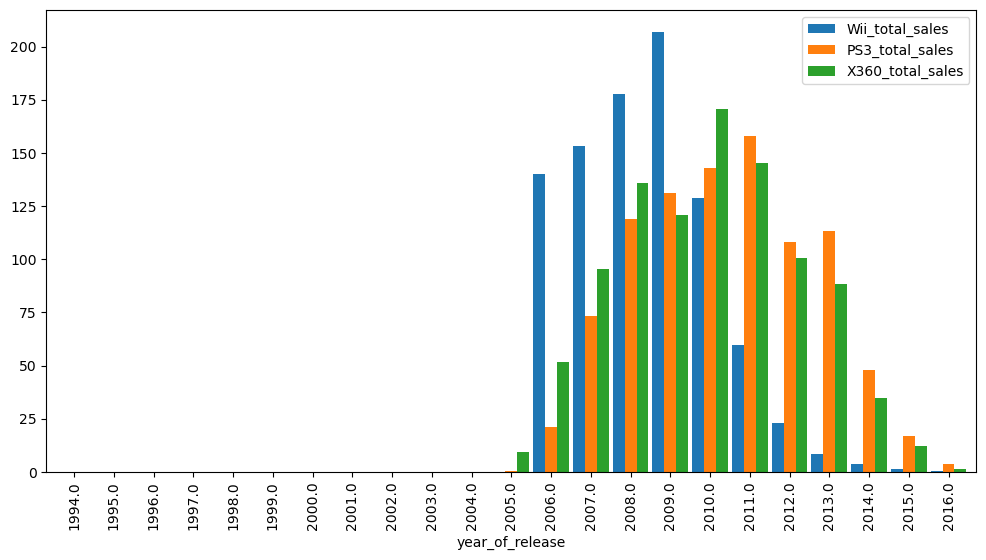

In [108]:
#Let's consider Wii, X360 and PS3
result_all[['Wii_total_sales','PS3_total_sales', 'X360_total_sales']].plot(kind ='bar',width=0.9, figsize=(12,6))
plt.show()

- We see here that PS3 and X360 platforms were released almost at the same time so they competed one another.
- We see here that for PS3 and for X360 took 3-4 years to appear and become popular.

**Let's see on heatmap now how does it generally took for new platforms to appear and old ones to fade.**

To do that let's build a pivot_table first with total sales for each platform for each year.

In [109]:
df = pd.pivot_table(games_high_sales, index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc ='sum', fill_value=0)
df.tail()

platform            DS  GBA   PS  PS2     PS3     PS4    Wii    X360
year_of_release                                                     
2012.0           11.67  0.0  0.0  0.0  108.28    0.00  22.94  100.72
2013.0            1.54  0.0  0.0  0.0  113.25   25.99   8.59   88.58
2014.0            0.00  0.0  0.0  0.0   47.76  100.00   3.75   34.74
2015.0            0.00  0.0  0.0  0.0   16.82  118.90   1.14   11.96
2016.0            0.00  0.0  0.0  0.0    3.60   69.25   0.18    1.52

In [110]:
#shift on 1 to be able to count difference
df.shift(+1).tail()

platform            DS  GBA   PS   PS2     PS3     PS4    Wii    X360
year_of_release                                                      
2012.0           26.33  0.0  0.0  0.45  157.98    0.00  59.79  145.23
2013.0           11.67  0.0  0.0  0.00  108.28    0.00  22.94  100.72
2014.0            1.54  0.0  0.0  0.00  113.25   25.99   8.59   88.58
2015.0            0.00  0.0  0.0  0.00   47.76  100.00   3.75   34.74
2016.0            0.00  0.0  0.0  0.00   16.82  118.90   1.14   11.96

In [111]:
#calculate dynanimcs and transpose the result
dynamics = df - df.shift(+1)
dynamics.T

year_of_release  1994.0  1995.0  1996.0  1997.0  1998.0  1999.0  2000.0  \
platform                                                                  
DS                  NaN    0.00    0.00    0.00    0.00    0.00    0.00   
GBA                 NaN    0.00    0.00    0.00    0.00    0.00    0.07   
PS                  NaN   29.93   58.74   41.47   33.32  -24.96  -48.16   
PS2                 NaN    0.00    0.00    0.95   -0.95    0.00   39.17   
PS3                 NaN    0.00    0.00    0.00    0.00    0.00    0.00   
PS4                 NaN    0.00    0.00    0.00    0.00    0.00    0.00   
Wii                 NaN    0.00    0.00    0.00    0.00    0.00    0.00   
X360                NaN    0.00    0.00    0.00    0.00    0.00    0.00   

year_of_release  2001.0  2002.0  2003.0  ...  2007.0  2008.0  2009.0  2010.0  \
platform                                 ...                                   
DS                 0.00    0.00    0.00  ...   27.42   -1.87  -25.80  -34.21   
GBA               61.46   12.63  -17.49  ...   -2.06   -3.40    0.00    0.00   
PS               -60.78  -28.92   -4.60  ...    0.00    0.00    0.00    0.00   
PS2              127.26   41.93  -15.31  ...  -27.89  -22.20  -27.50  -20.76   
PS3                0.00    0.00    0.00  ...   52.23   45.60   12.14   12.03   
PS4                0.00    0.00    0.00  ...    0.00    0.00    0.00    0.00   
Wii                0.00    0.00    0.00  ...   13.22   24.27   29.29  -78.30   
X360               0.00    0.00    0.00  ...   43.62   40.66  -15.25   49.73   

year_of_release  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  
platform                                                         
DS               -59.02  -14.66  -10.13   -1.54    0.00    0.00  
GBA                0.00    0.00    0.00    0.00    0.00    0.00  
PS                 0.00    0.00    0.00    0.00    0.00    0.00  
PS2               -5.19   -0.45    0.00    0.00    0.00    0.00  
PS3               15.02  -49.70    4.97  -65.49  -30.94  -13.22  
PS4                0.00    0.00   25.99   74.01   18.90  -49.65  
Wii              -68.88  -36.85  -14.35   -4.84   -2.61   -0.96  
X360             -25.32  -44.51  -12.14  -53.84  -22.78  -10.44  

[8 rows x 23 columns]

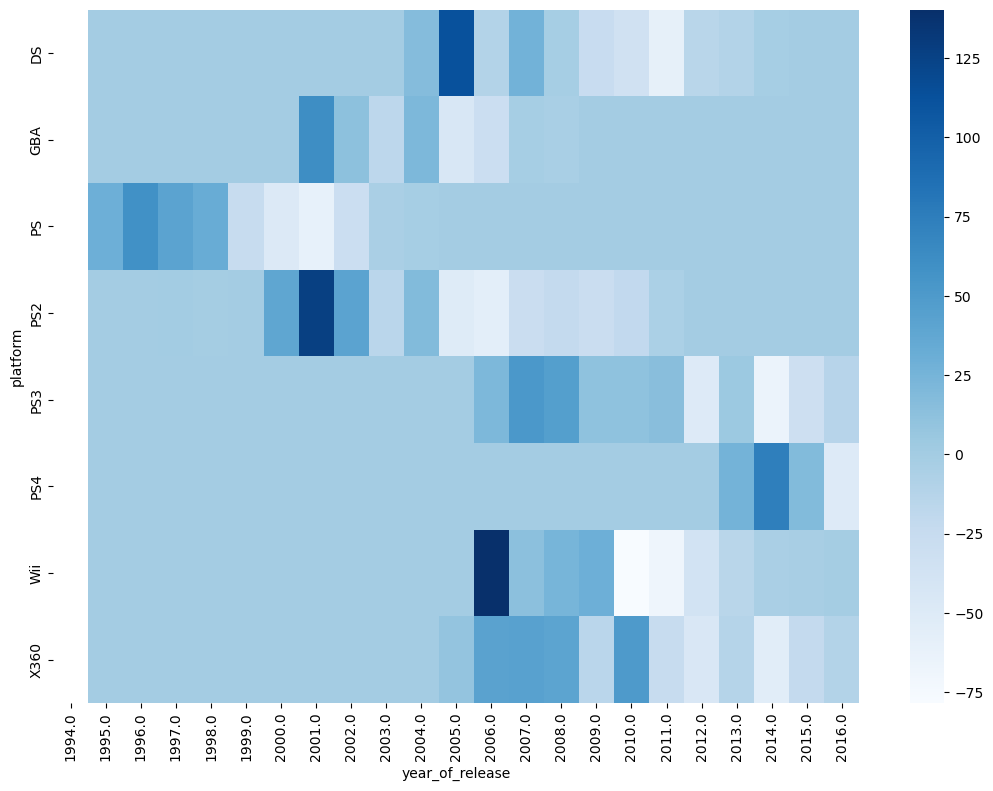

In [112]:
#we can plot a heatmap with changes of sales for each platform for each year
plt.figure(figsize=(13,9))
sns.heatmap(dynamics.T,cmap='Blues')
plt.show()

From these heatmap we can conclude following (for platforms with high sales):
- It usually took 1 year for the platform to appear - from the first year sales are very high
- The top sales last approximately 4 years (intensive blue color)
- After that period sales are staring to fall (light blue or white color)
- It took approximately 4 years for platform to stop the sales (lenght of light blue or white color)

- **Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.**
- **Work only with the data that you've decided is relevant. Disregard the data for previous years.**

I would take a data slice which contain games released after 2000. On graphs in previous questions we saw that the number of games released before 2000 is relatively small. And to have symmetric data which looks similar to normal distribution it's better to throw out data of video games released before 2000.

In [113]:
#Let's see the new graph for filtered data
games_new = games[games.year_of_release > 2000]

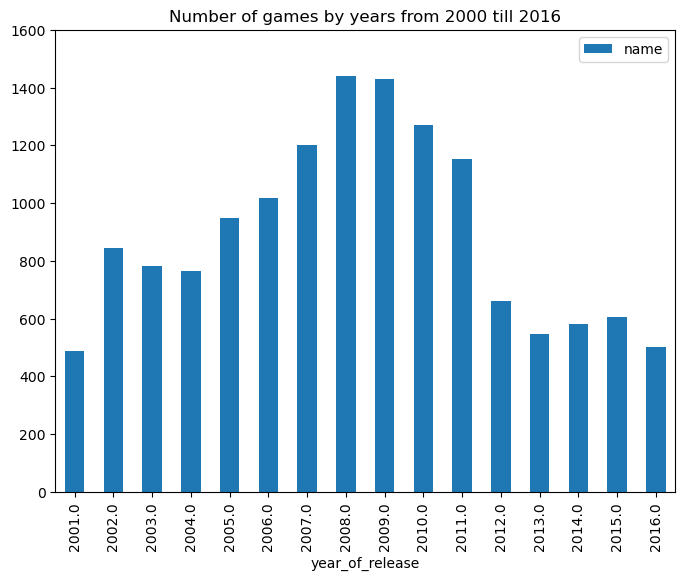

In [114]:
#build a pivot table of total number of games released for each year
num_games_new = games_new.pivot_table(index='year_of_release',values='name',aggfunc='count')

#plot the bar graph
num_games_new.plot(kind='bar',figsize=(8,6),title="Number of games by years from 2000 till 2016")
plt.ylim(ymin=0, ymax=1600)
plt.show()

This data looks more normally distributed than the whole games dataset. So let's continue working with it.

- **Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.**

In [115]:
#let's create a new df with grouped data to answer the question
sales_dynamics=games_new[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()

In [116]:
#let's build a new column with Z score
sales_dynamics['sales_z']=(sales_dynamics['total_sales'] - sales_dynamics['total_sales'].mean()) / sales_dynamics['total_sales'].std()

In [117]:
sales_dynamics.sample(5)

platform  total_sales   sales_z
10       XB       255.70 -0.246523
16      Wii       903.31  1.438819
3        GB         9.24 -0.887911
17      PS3       934.71  1.520535
8        GC       198.66 -0.394964

In [118]:
#create a colors category for each platform
sales_dynamics['colors'] = ['red'  if x<0 else 'green' for x in sales_dynamics['sales_z']  ]
sales_dynamics.sample(5)

platform  total_sales   sales_z colors
14      PS4       314.14 -0.094439    red
13      GBA       313.66 -0.095688    red
18     X360       966.61  1.603551  green
9        PC       204.16 -0.380651    red
7      XOne       159.32 -0.497343    red

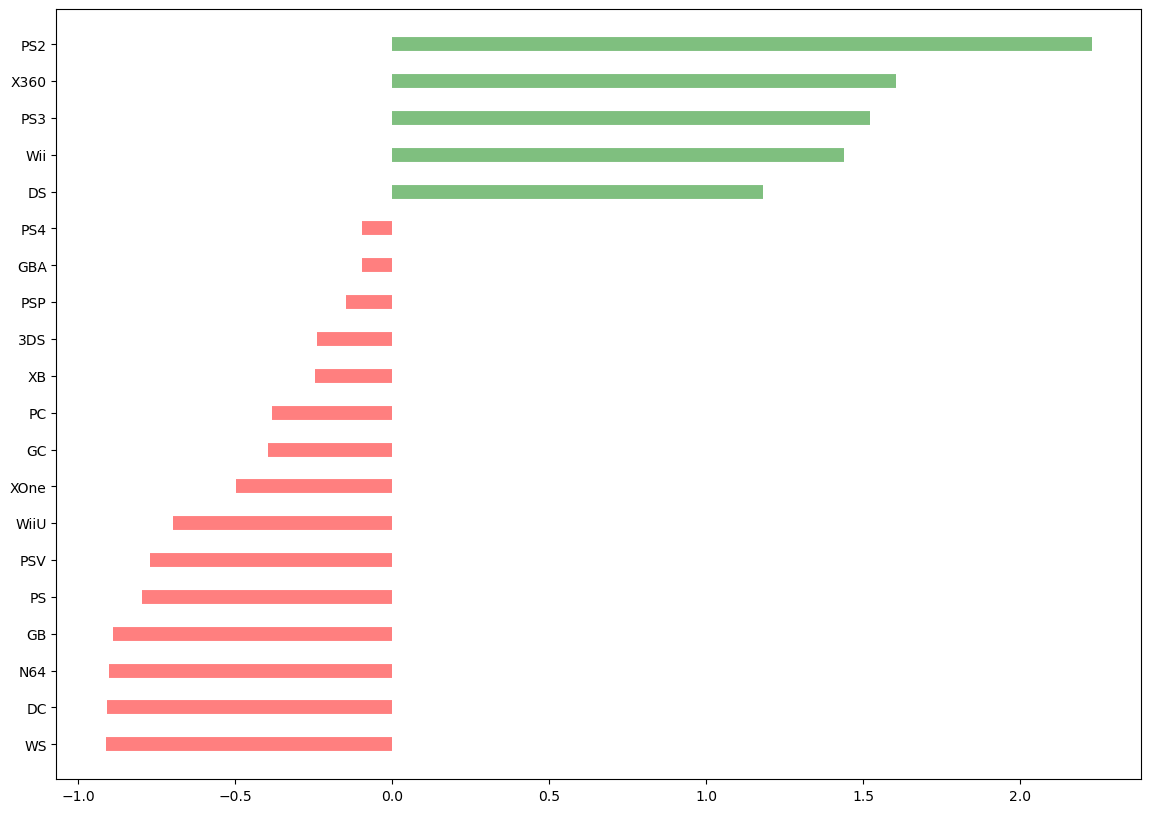

In [119]:
#let's plot now what we got
plt.figure(figsize = (14,10))
plt.hlines(y=sales_dynamics.platform, xmin=0, xmax =sales_dynamics.sales_z, color = sales_dynamics.colors, alpha=0.5, linewidth = 10)
plt.show()

We see that platforms with positive z score or in other words the total sales of these platforms is higher than the mean average are **PS2, X360, PS3, Wii and DS. So these platform are leading in sales and potentially most profitable.**

In [120]:
#let's build a pivot table on a base of new filtered data
pl_sales_dynamics = pd.pivot_table(games_new,index='year_of_release',columns ='platform',values ='total_sales',aggfunc ='sum',fill_value=0)
pl_sales_dynamics.head()

platform         3DS    DC      DS    GB    GBA     GC   N64     PC     PS  \
year_of_release                                                              
2001.0           0.0  1.07    0.00  9.24  61.53  26.62  3.25   5.47  35.59   
2002.0           0.0  0.29    0.00  0.00  74.16  52.29  0.08   8.57   6.67   
2003.0           0.0  0.00    0.00  0.00  56.67  51.20  0.00   8.89   2.07   
2004.0           0.0  0.00   17.27  0.00  77.91  28.82  0.33  10.39   0.00   
2005.0           0.0  0.00  130.14  0.00  34.53  27.91  0.00   4.38   0.00   

platform            PS2   PS3  PS4    PSP  PSV    WS  Wii  WiiU  X360     XB  \
year_of_release                                                                
2001.0           166.43  0.00  0.0   0.00  0.0  0.28  0.0   0.0  0.00  23.82   
2002.0           208.36  0.00  0.0   0.00  0.0  0.00  0.0   0.0  0.00  51.00   
2003.0           193.05  0.00  0.0   0.00  0.0  0.00  0.0   0.0  0.00  55.05   
2004.0           211.81  0.00  0.0   7.06  0.0  0.00  0.0   0.0  0.00  65.97   
2005.0           160.91  0.19  0.0  43.84  0.0  0.00  0.0   0.0  9.22  49.09   

platform         XOne  
year_of_release        
2001.0            0.0  
2002.0            0.0  
2003.0            0.0  
2004.0            0.0  
2005.0            0.0

In [121]:
pl_sales_dynamics.shift(+1).tail()

platform           3DS   DC     DS   GB  GBA   GC  N64     PC   PS   PS2  \
year_of_release                                                            
2012.0           63.20  0.0  26.33  0.0  0.0  0.0  0.0  35.16  0.0  0.45   
2013.0           51.76  0.0  11.67  0.0  0.0  0.0  0.0  23.45  0.0  0.00   
2014.0           56.57  0.0   1.54  0.0  0.0  0.0  0.0  13.01  0.0  0.00   
2015.0           43.76  0.0   0.00  0.0  0.0  0.0  0.0  13.28  0.0  0.00   
2016.0           27.78  0.0   0.00  0.0  0.0  0.0  0.0   8.52  0.0  0.00   

platform            PS3     PS4    PSP    PSV   WS    Wii   WiiU    X360   XB  \
year_of_release                                                                 
2012.0           157.98    0.00  17.82   4.63  0.0  59.79   0.00  145.23  0.0   
2013.0           108.28    0.00   7.95  16.19  0.0  22.94  17.56  100.72  0.0   
2014.0           113.25   25.99   3.38  10.59  0.0   8.59  21.65   88.58  0.0   
2015.0            47.76  100.00   0.24  11.90  0.0   3.75  22.03   34.74  0.0   
2016.0            16.82  118.90   0.12   6.25  0.0   1.14  16.35   11.96  0.0   

platform          XOne  
year_of_release         
2012.0            0.00  
2013.0            0.00  
2014.0           18.96  
2015.0           54.07  
2016.0           60.14

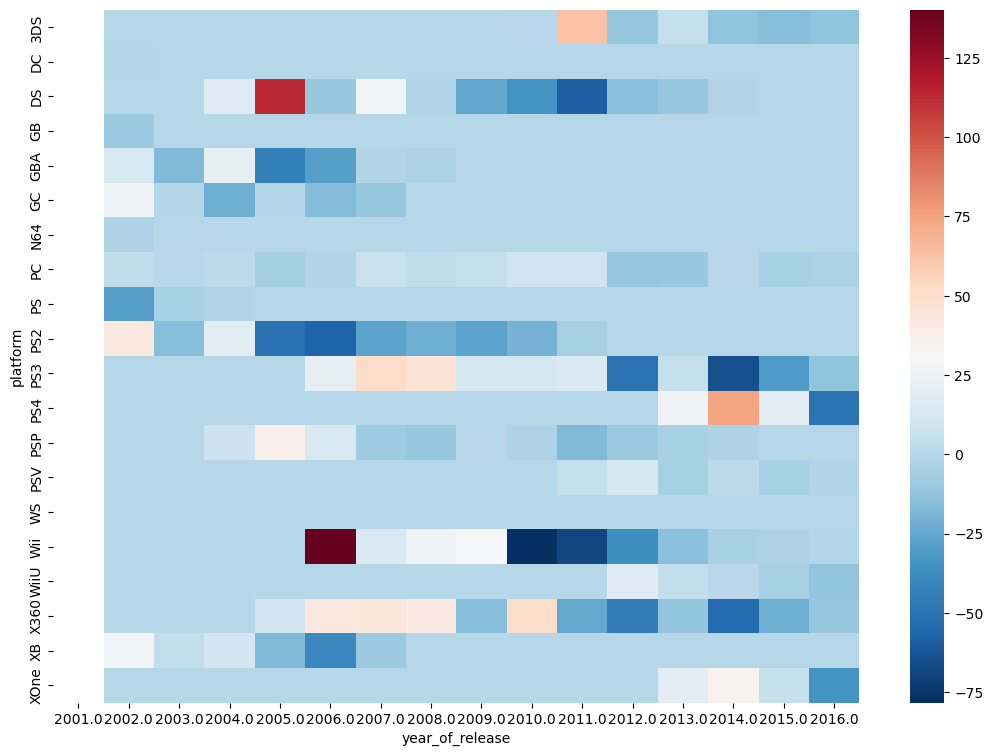

In [122]:
#let's plot a heat map with rises and falls of sales for new filtered data started from 2000
dynamics = pl_sales_dynamics - pl_sales_dynamics.shift(+1)

plt.figure(figsize=(13,9))
sns.heatmap(dynamics.T,cmap='RdBu_r')
plt.show()

**Which ones are growing or shrinking?**

We can see on a plot above all rises and falls of sales for each platform for each year. Here some highlightes from the graph:
- DS platform the had high sales in 2005 (red square)
- After 2008 sales on DS platform were shrinking
- We see shrinking of sales on PS2 platfrom starting from 2005 (deep blue color)
- We see quite good sales on PS3 platfrom from 2006 till 2011
- Constant shrinking on PS3 platfrom from 2014 year (deep blue color)
- The best year for PS4 was 2014, 2013 and 2015 were also good
- The Wii platform had extremly high sales in 2006 (deep red color)
- We see the good grow of sales of X360 platform from 2006 till 2008 and in 2010
- The XOne platform had one good year with grow in sales in 2014 (bottom of the graph)

- **Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.**

In [123]:
#let's group the data to creare a boxplot
grouped = games_new.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
grouped

platform  year_of_release  total_sales
0        3DS           2010.0         0.30
1        3DS           2011.0        63.20
2        3DS           2012.0        51.76
3        3DS           2013.0        56.57
4        3DS           2014.0        43.76
..       ...              ...          ...
139       XB           2008.0         0.18
140     XOne           2013.0        18.96
141     XOne           2014.0        54.07
142     XOne           2015.0        60.14
143     XOne           2016.0        26.15

[144 rows x 3 columns]

In [124]:
#let's create the order by sales - from the smallest ones to the greatest
ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

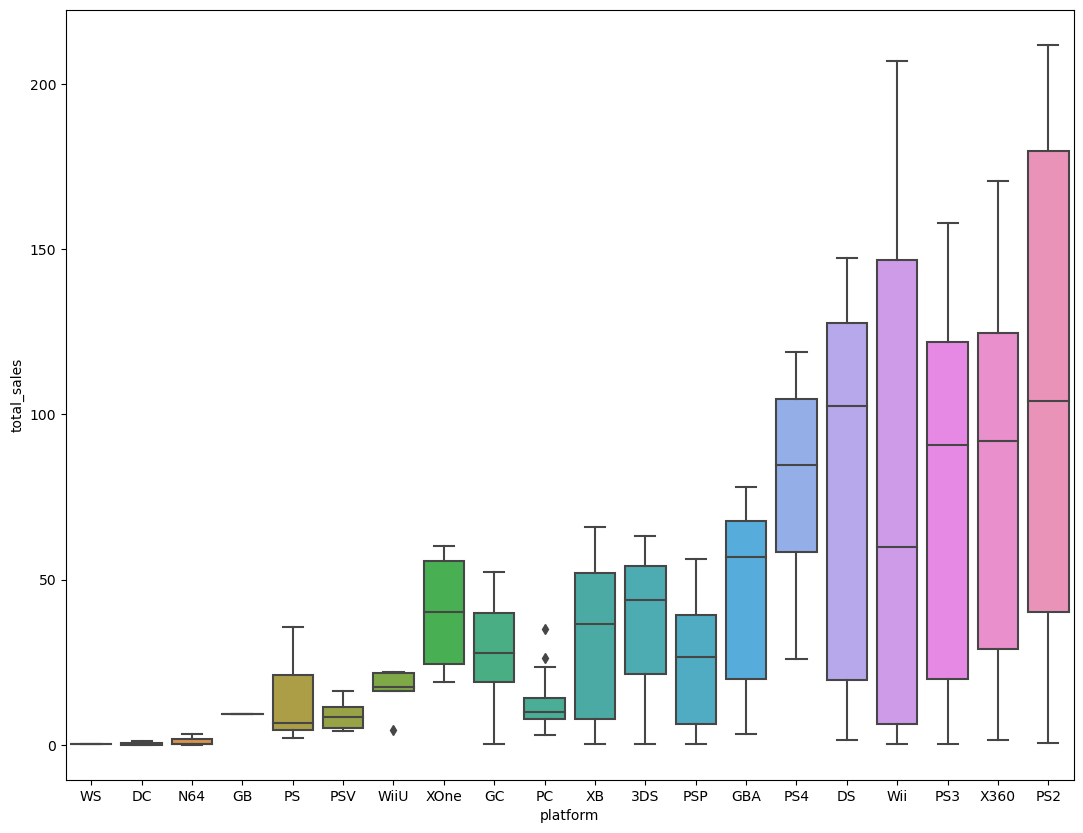

In [125]:
#let's create a boxplot
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped,order=ordered)
plt.show()

**Top highlights from the boxplot:**

- We see top profitable platforms on the right side of box plot. These are: PS4, DS, Wii, PS3, X360, PS2.
- The PS4 was very popular because even in bad year the minimum profit was higher than median for many other platforms (for example for Wii platform).
- The highest median value of sales has DS platform
- The highest sales value (upper limit) has the PS2 platform, on the second place Wii.
- We see that the platforms which is more likely normally distributed is PS2, XOne, GC. Boxplots for these platforms are symmetricaly, have median value in the middle of the boxplot and almost symmetrical whiskers.
- We see that platforms WiiU and PC have some outliers

- **Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

Let's select PS2 platform as the most popular over the all period of time and we have more data for that. One more reason to choose this platform: we know that the data for this platform looks normally distributed.

In [126]:
 # let's create a function to build a scatter plots and calculate the correlations
def scatter(platform,data,parameters):
    data_new = data.query('platform == @platform')
    for param in parameters:
        data_new.plot(x=param,y='total_sales',kind='scatter',alpha=0.03,title=("Scatter plot between "+param+ " and total sales for "+ platform+" platform"))
        plt.show()
        correlation = data_new['total_sales'].corr(data_new[param])
        print("Correlation between total sales and",param,"is ",round(correlation,2))
            

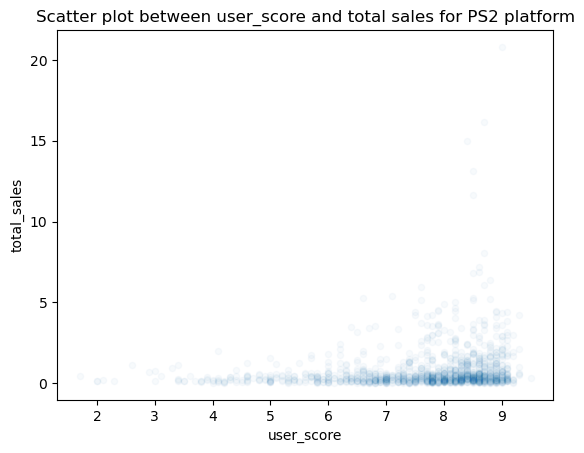

Correlation between total sales and user_score is  0.17


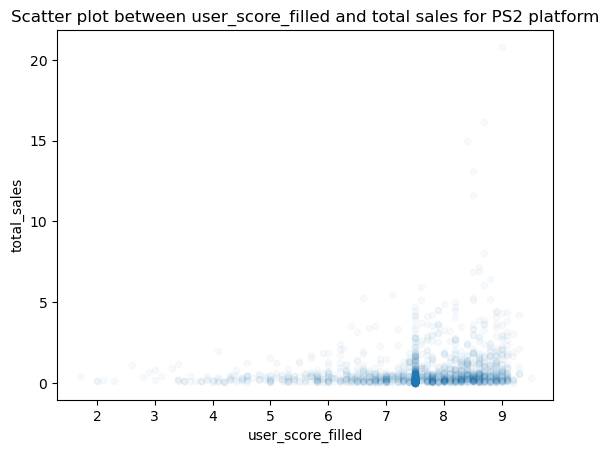

Correlation between total sales and user_score_filled is  0.17


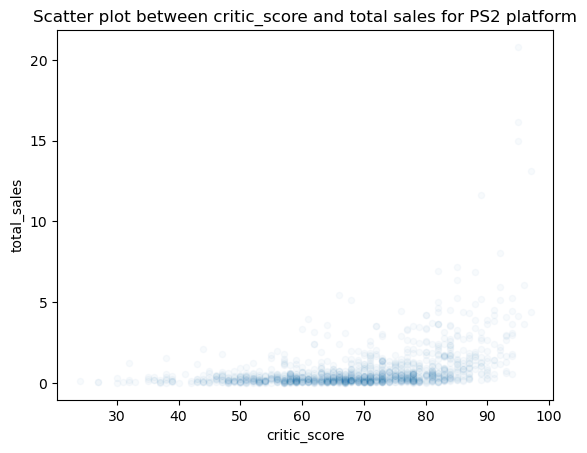

Correlation between total sales and critic_score is  0.4


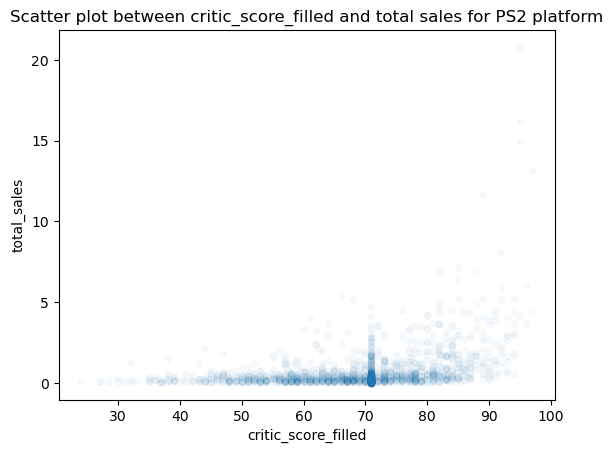

Correlation between total sales and critic_score_filled is  0.34


In [127]:
parameters=['user_score','user_score_filled','critic_score','critic_score_filled']
scatter('PS2',games_new,parameters)

I built scatter plots for 'total_sales' column and 'user_score', 'user_score_filled', 'critic_score', 'critic_score_filled' columns. What can I conclude: 

- There is no big difference between 'user_score' and 'user_score_filled' columns, as well as 'critic_score' and 'critic_score_filled' columns. We remeber that the first ones are columns with NaNs and the second ones - with filled NaNs.
- We got the same correlation betwen 'user_score' and 'total_sales' and between 'user_score_filled' and 'total_sales'.
- This correlation is 0.17, so I can conclude there is no correlation or weak correlation between user scores and sales. 
- But on a scatter plot we see users tend to buy games with user score above 6 or even 7. 
- We see that most part of sold games have user score above 7. And we see a big amount of games with 7.5 user score, it's obvious that this is data which we filled.
- Correlation number for 'critic_score' and 'total_sales' columns 0,4 is bigger than correlation between 'user_score' and 'total_sales' 0,17
- Correlation number for 'critic_score' and 'total_sales' columns 0,4 is bigger than correlation between 'critic_score_filled' and 'total_sales' columns - 0,34.
- On a scatter plot for critic_score and 'total_sales' columns we see that the most game sold have critic score from 60 till 80.
- On the last scatter plot we also see the data where we filled the NaNs with average critic score - slightly over 70
- I can definitely conclude that the users rate the games higher than professionals.

Let's check the same for other major platforms.

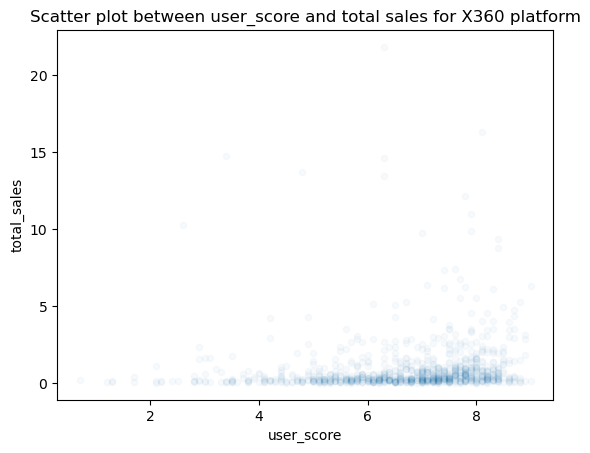

Correlation between total sales and user_score is  0.11


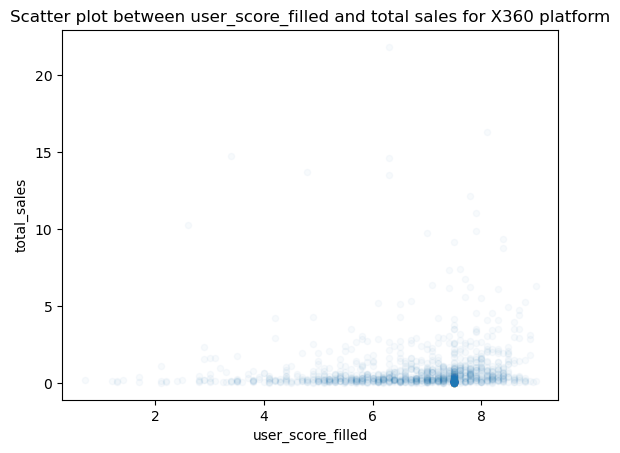

Correlation between total sales and user_score_filled is  0.07


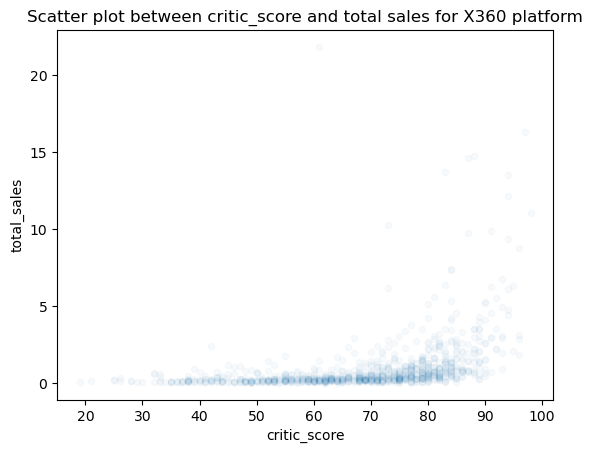

Correlation between total sales and critic_score is  0.39


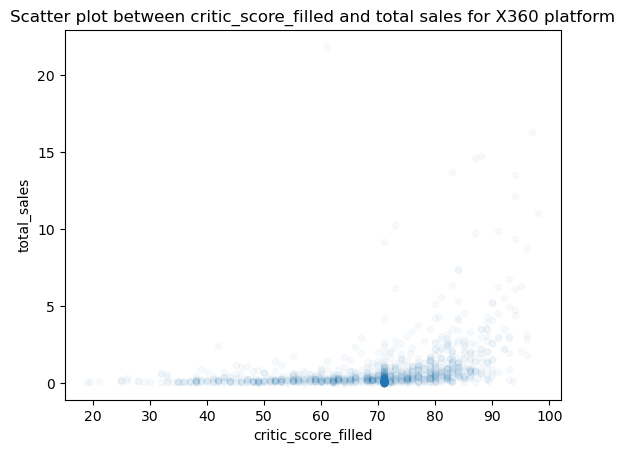

Correlation between total sales and critic_score_filled is  0.35


In [128]:
#second platform by total sales X360
scatter('X360',games_new,parameters)

- Correlation between user scores and total sales for X360 is much weaker than for PS. 
- It's only 0.11 for data with NaNs and 0.7 for filled data
- Correlation between critic scores and total sales for X360 is about 0.35-0.39, this is closely to the same  correlation for PS2
- On scatter plot we see that we have less data for X360 than for PS2 (graphs are more transparent)
- Users tend to buy games on X360 with user score above 6 and critic score above 65-70.

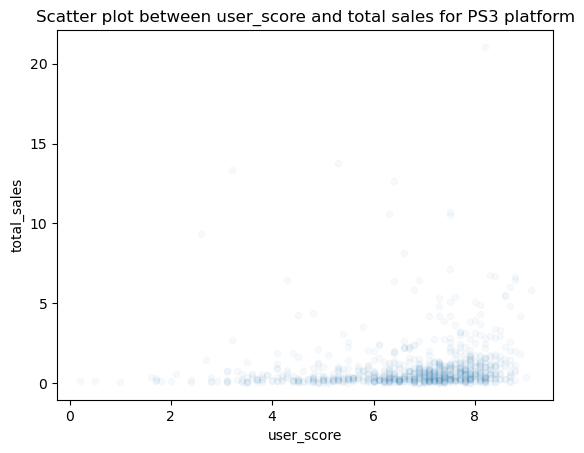

Correlation between total sales and user_score is  0.13


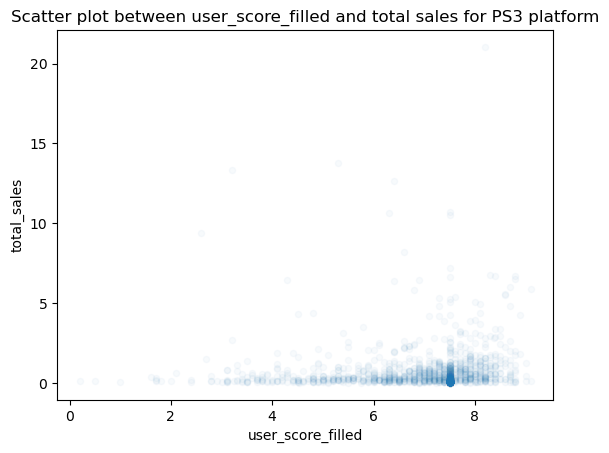

Correlation between total sales and user_score_filled is  0.06


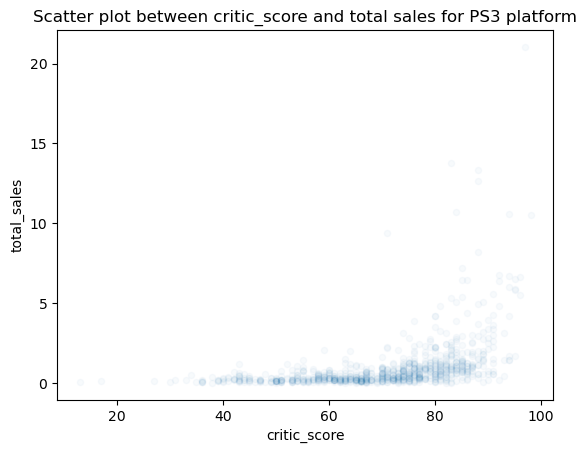

Correlation between total sales and critic_score is  0.43


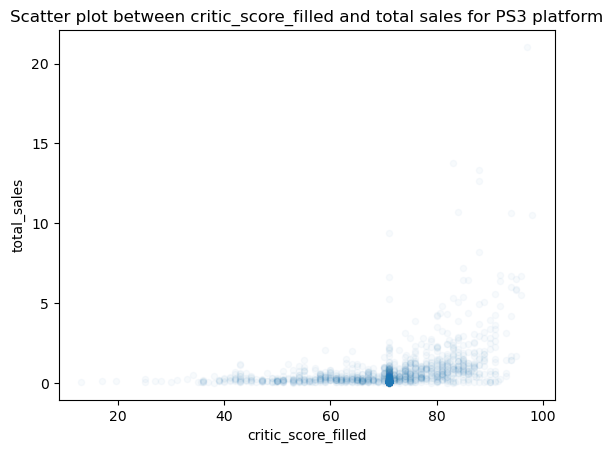

Correlation between total sales and critic_score_filled is  0.38


In [129]:
#third platform by total sales PS3
scatter('PS3',games_new,parameters)

- Correlation between user scores and total sales for PS3 is also weak as was for X360 (0.13 and 0.06).
- Correlation between critic scores and total sales for PS3 is also around 0.4 like was for X360 and PS2.
- On scatter plot we see that users tend to buy games on PS3 with user score above 6 and critic score above 70.

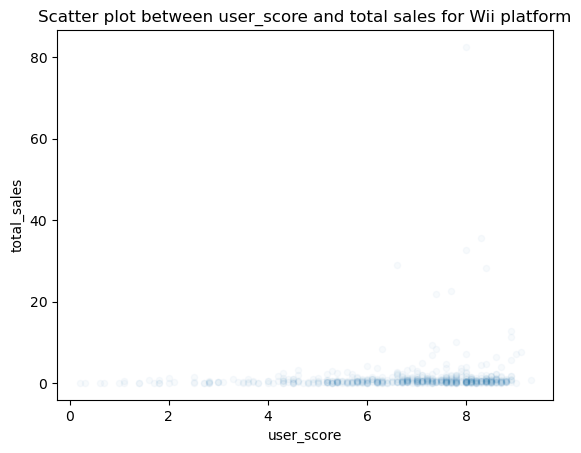

Correlation between total sales and user_score is  0.11


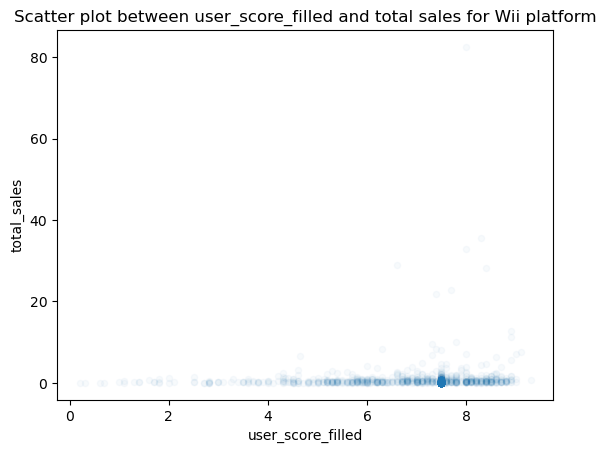

Correlation between total sales and user_score_filled is  0.06


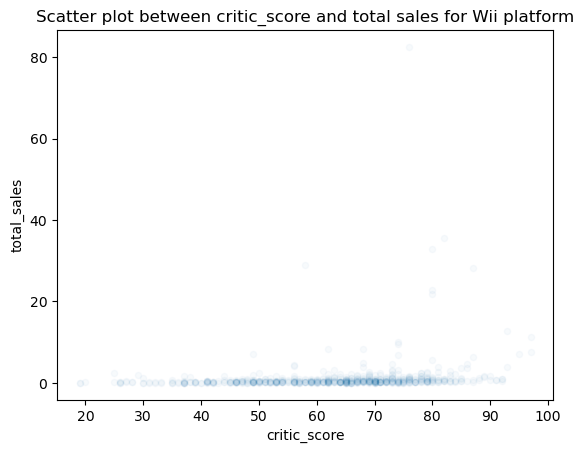

Correlation between total sales and critic_score is  0.18


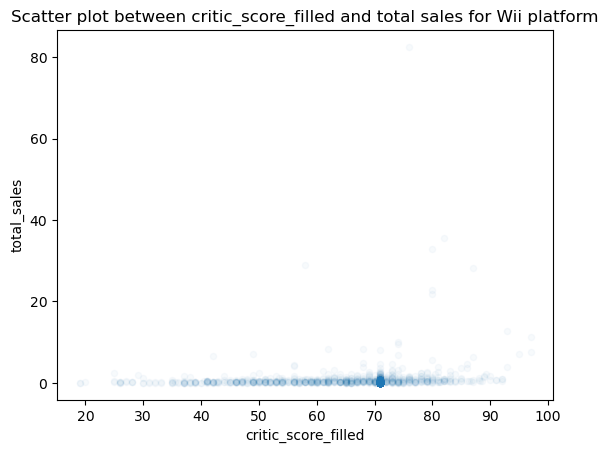

Correlation between total sales and critic_score_filled is  0.11


In [130]:
#let's do the same for Wii platform
scatter('Wii',games_new,parameters)

- Wee see here more flat scatter with less dispersion.
- The correlaition number for Wii for user scores and critic scores and total sales the smallest among all platforms
- So we can conclude there aren't such strong correlation between user/critic scores and total sales
- On scatter we can see that users tend to but games with user score above 7 and critic score in range 60-80  
- I think the most popular games of Wii platform got the critic scores in this range 60-80 

- **Keeping your conclusions in mind, compare the sales of the same games on other platforms.**

In [131]:
games_high_sales = games_new.pivot_table(index=['name'],values='total_sales',aggfunc='sum',fill_value=0)
games_high_sales.sort_values(by='total_sales',ascending=False,inplace=True)

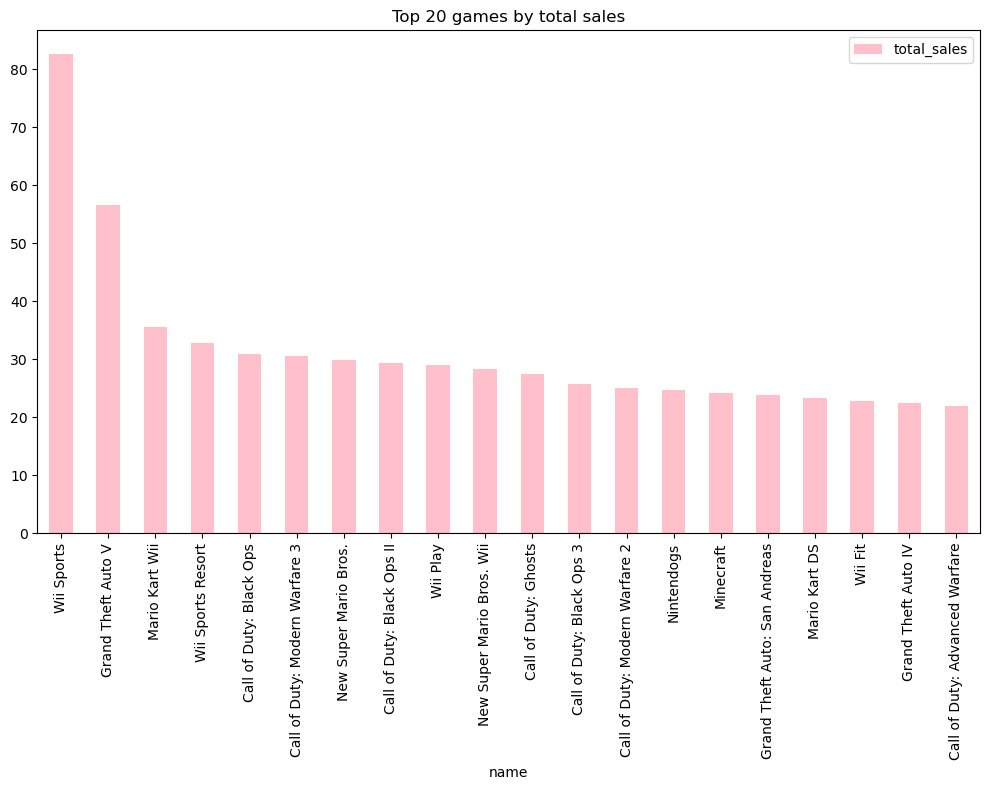

In [132]:
games_high_sales.head(20).plot(kind='bar',figsize=(10,8),title='Top 20 games by total sales',color='pink')
plt.tight_layout()
plt.show()

In [133]:
games_high_sales.describe()

total_sales
count  9405.000000
mean      0.745197
std       2.219416
min       0.000000
25%       0.050000
50%       0.170000
75%       0.560000
max      82.540000

We see that the biggest sales has game Wii Sports with 82.54 total sales, on the second place is Grand Theft Auto V with 56.58 total sales, on the third one - Mario Kart Wii with 35.52 total sales.

Let's build the tree map for top 150 games by total sales, and consider how sales changes for these games on different platforms. (I choose 150 games empirically. The graph built of this value of data is not too atomized and can be read).

In [134]:
#build a pivot table
games_high_sales = games_new.pivot_table(index=['name','platform'],values='total_sales',aggfunc='sum',fill_value=0)
#sort values by total sales
games_high_sales.sort_values(by='total_sales',ascending=False,inplace=True)

#get a data slice - first 150 games
games_high_sales_top = games_high_sales.head(150)
games_high_sales_top.reset_index(inplace=True)
#games_high_sales_top


In [135]:
#!pip install --upgrade plotly

In [136]:
import plotly.express as px

fig = px.treemap(games_high_sales_top, 
                 path=['name', 'platform'], 
                 values='total_sales',
                 color='name'
                )
fig.show()

We can see on a tree map that many games presented on only one platform (or sales of these games on other platforms very small and did not get into out filter of top 150 games by total sales).

And we can conclude that lot's of top profitable games belongs to Wii platform. 

For example we saw before that the biggest sales has "Wii Sports" game and this game presented only on the Wii platform. At the same time Grand Theft Auto V - the second popular game by sales presented on at least 4 platforms (4 platforms which get into 150 games by total sales)

We also have a lot of games here from PS2, PS3, PS4 platforms, DS and X360.

We can click on this graph on each game we want to see more closely. 

Let's build some graphs for some other popular games from the graph "'Top 20 games by total sales". 

In [137]:
#let's build graph for Grand Theft Auto V game - the second game by value of total sales
GTA = games_new[games_new.name=='Grand Theft Auto V']

fig = px.treemap(GTA, 
                 path=['name', 'platform'], 
                 values='total_sales',
                 color='total_sales'
                )
fig.show()

We see that the biggest sales to the Grand Theft Auto V game brought PS3 platform, the game also made good sales on PS4 and X360 platforms.

The next game from the graph "Top 20 games by total sales" which do not belong to only Wii platform is Call of Duty: Black Ops. Let's plot a tree map for it.

In [138]:
#let's build graph for Call of Duty: Black Ops game
COD = games_new[games_new.name=='Call of Duty: Black Ops']

fig = px.treemap(COD, 
                 path=['name', 'platform'], 
                 values='total_sales',
                 color='total_sales'
                )
fig.show()

We see that this game had the highest sales on X360 and PS3 and relatively small on PC, Wii and DS.

Let's consider one more game of Call of Duty series: Modern Warfare 3

In [139]:
#let's build graph for Call of Duty: Modern Warfare 3
COD = games_new[games_new.name=='Call of Duty: Modern Warfare 3']

fig = px.treemap(COD, 
                 path=['name', 'platform'], 
                 values='total_sales',
                 color='total_sales'
                )
fig.show()

We see here that Call of Duty: Modern Warfare 3 also like with Call of Duty: Black Ops made biggest sales on X360 and PS3, other platforms were game was presented - PC and Wii.

Let's consider one last game here - Minecraft. This is very popular game, so I'm just curious how sales of this game differs on different platforms.

In [140]:
#let's build graph for Minecraft
MNCRFT = games_new[games_new.name=='Minecraft']

fig = px.treemap(MNCRFT, 
                 path=['name', 'platform'], 
                 values='total_sales',
                 color='total_sales'
                )
fig.show()

We see that Minecraft was released on many different platforms: X360, PS3 and PS4, XOne, PSV and WiiU. The highest sales were on X360, PS3 and PS4 platforms. 

- **Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?**

In [141]:
#build a pivot table with total number of games of each genre
games_genre_num = games_new.pivot_table(index=['genre'],values='name',aggfunc='count',fill_value=0)
games_genre_num.sort_values(by='name',ascending=False,inplace=True)

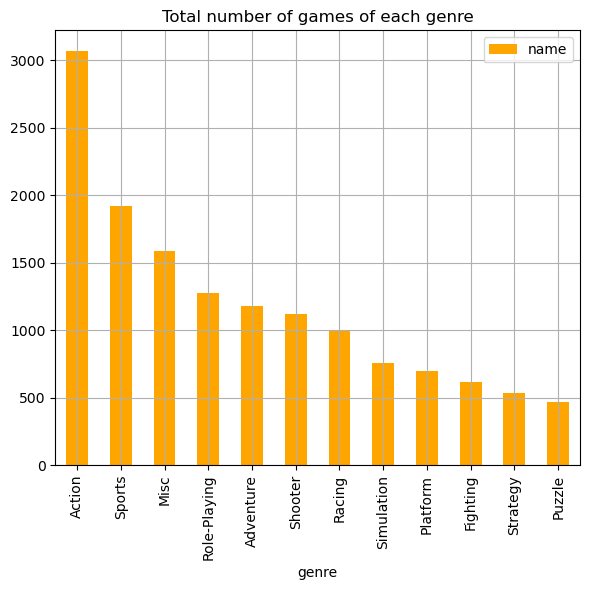

In [142]:
#plot the bar chart of how many games have each genre 
games_genre_num.plot(kind='bar',figsize=(6,6),title='Total number of games of each genre',color='orange',grid=True)
plt.tight_layout()
plt.show()

The biggest number of games are action genre. Second genre by popularity is Sports.
The less popular genre is Puzzle.

In [143]:
#let's modify a function we write above to a function to build the distribution graphs for each genre

def distr_by_year (data,genres):
    for genre in genres:
        print(data.query('genre == @genre')
              .pivot_table(index='year_of_release',values='name',aggfunc='count')
              .plot(kind='bar',title=genre) )
        plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


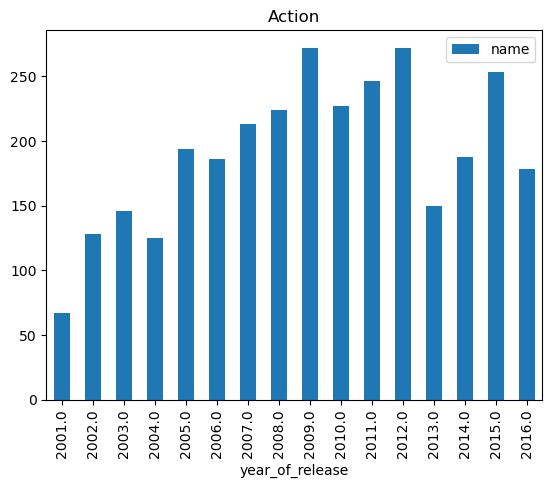

AxesSubplot(0.125,0.11;0.775x0.77)


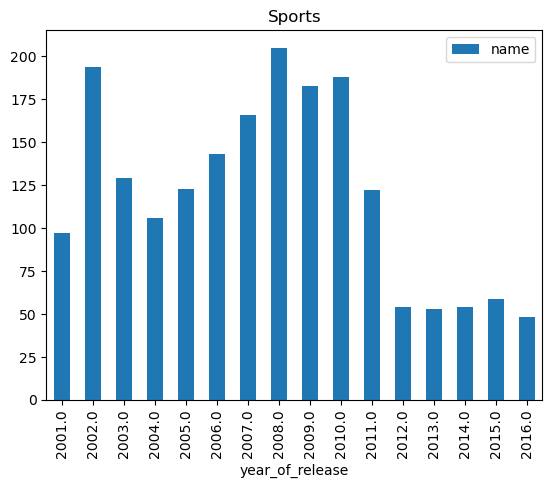

AxesSubplot(0.125,0.11;0.775x0.77)


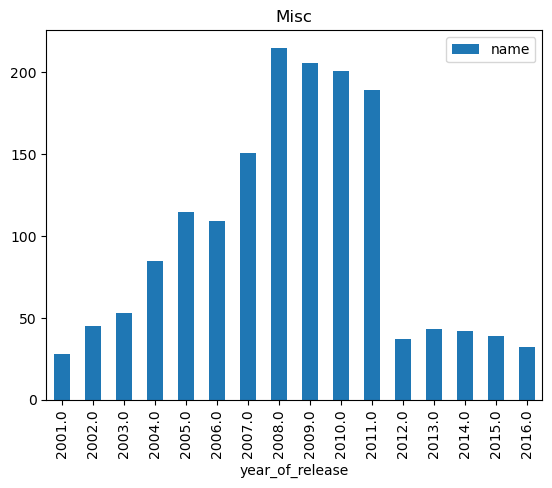

AxesSubplot(0.125,0.11;0.775x0.77)


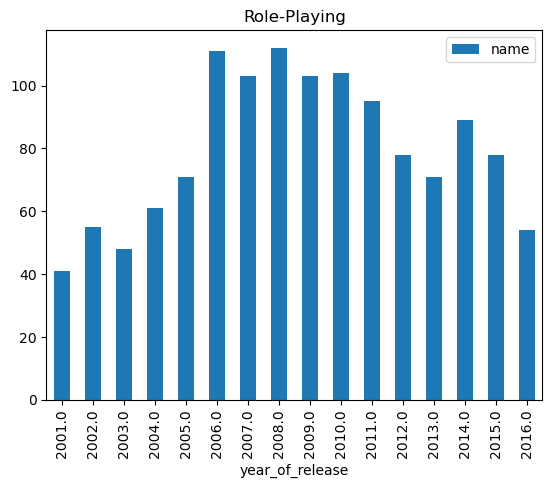

AxesSubplot(0.125,0.11;0.775x0.77)


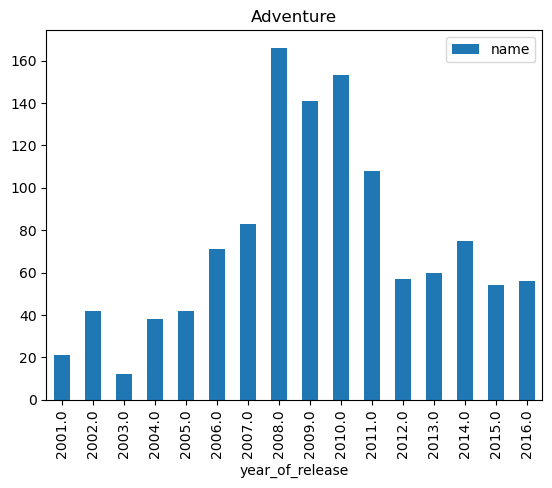

AxesSubplot(0.125,0.11;0.775x0.77)


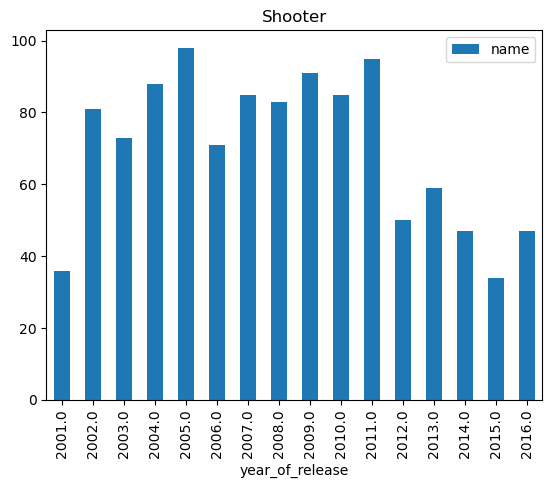

AxesSubplot(0.125,0.11;0.775x0.77)


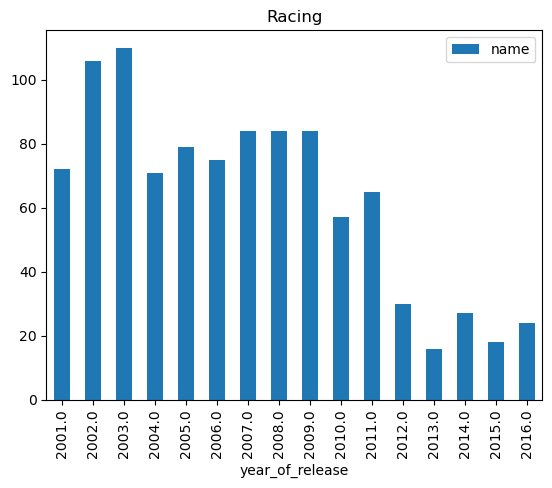

AxesSubplot(0.125,0.11;0.775x0.77)


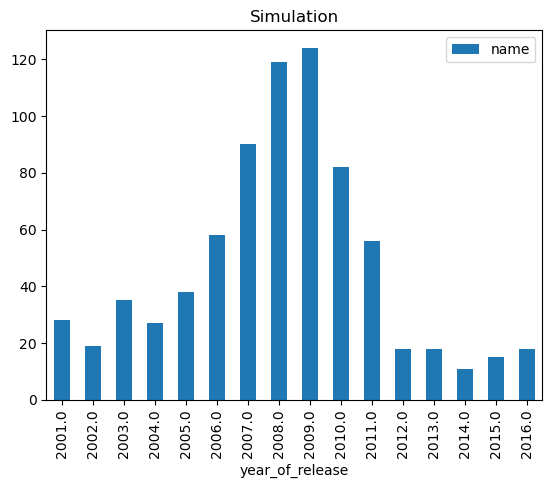

AxesSubplot(0.125,0.11;0.775x0.77)


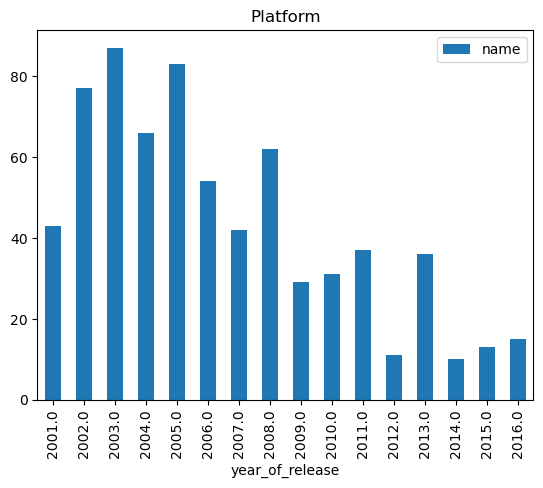

AxesSubplot(0.125,0.11;0.775x0.77)


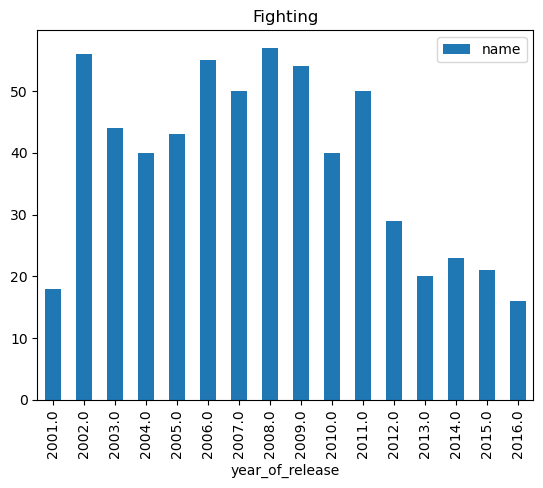

AxesSubplot(0.125,0.11;0.775x0.77)


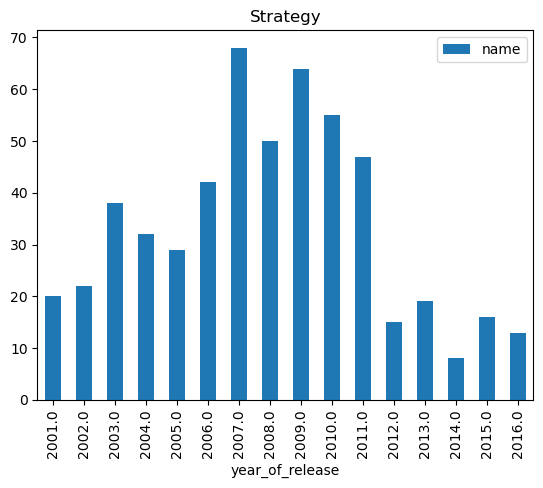

AxesSubplot(0.125,0.11;0.775x0.77)


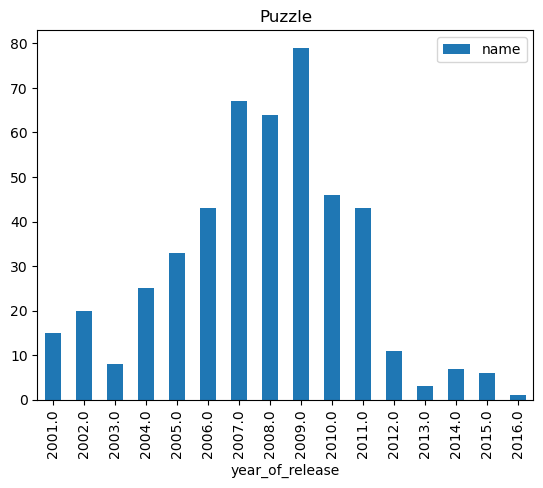

In [144]:
#list of all genres we have
genres = games_genre_num.index.tolist()

#build the graphs
distr_by_year(games_new,genres)

- We see that number of Action games grew from 2001 till 2009 year.
- After that time the graph have periodical declines and  rises.

- Graph of Sports games have a big rise in 2002 and in 2008
- After 2011 number of games fall and was on almost the same level

- Games of misc genre grew from 2001 till 2008
- After 2011 we see there were a drastical fall of number of such games

- Role-Playing games have peak in 2008
- The graph for such games looks like the top of the graph of normal distibution

- Graph for Adventure games look very normally distributed
- The graph has peak from 2008 till 2010

- The number of Shooter games is high from 2002 till 2011
- From 2011 number of Shooter games is slowly decreasing

- Racing games have peaks in 2002-2003 and after that number of games are slowly decreasing
- Graphs of Simulation and Puzzle games look like normal distribution
- Number of platform games decreasing from 2003
- Graphs of Strategy games look like normal distribution with some outlier on the left side

In [145]:
#build a pivot table to count total sales for each genre
games_genre = games_new.pivot_table(index=['genre'],values='total_sales',aggfunc='sum',fill_value=0)
games_genre.sort_values(by='total_sales',ascending=False,inplace=True)
#games_genre

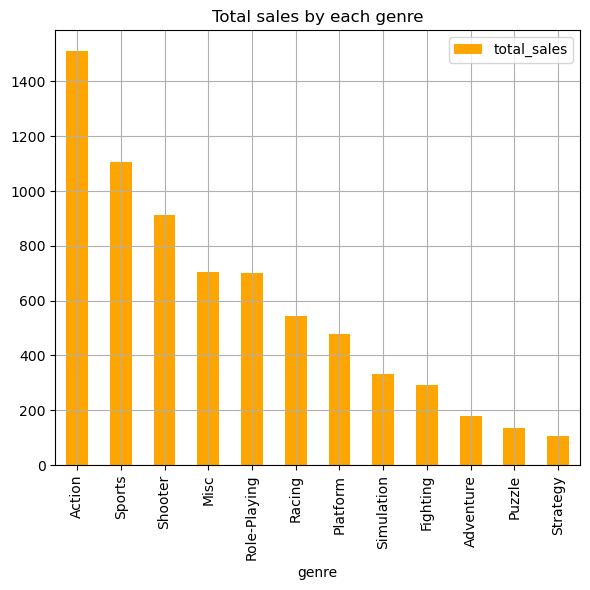

In [146]:
#let's plot total sales for each genre in descending order
games_genre.plot(kind='bar',figsize=(6,6),title='Total sales by each genre',color='orange',grid=True)
plt.tight_layout()
plt.show()

We see that the biggest sales have the games of Action genre, on the second place by total sales are games of Sports genre, and next go Shooter games. The less profitable are Strategy games.

In [147]:
#let's modify function a bit to plot distribution of sales for each genre by years
def distr_by_year_sales (data,genres):
    for genre in genres:
        print(data.query('genre == @genre')
              .pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
              .plot(kind='bar',title=genre) )
        plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


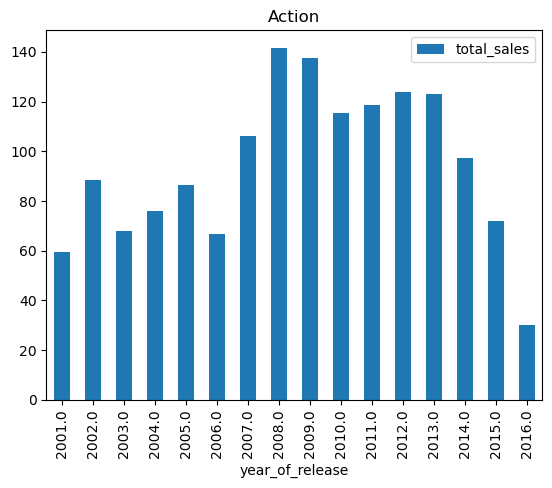

AxesSubplot(0.125,0.11;0.775x0.77)


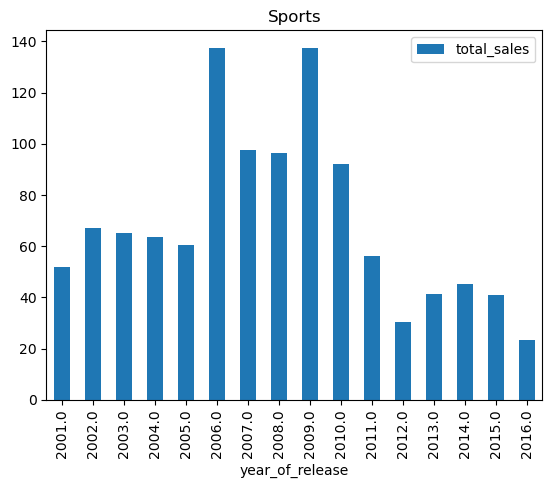

AxesSubplot(0.125,0.11;0.775x0.77)


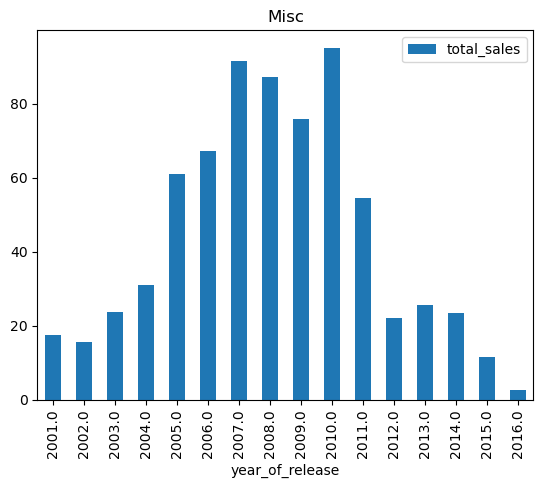

AxesSubplot(0.125,0.11;0.775x0.77)


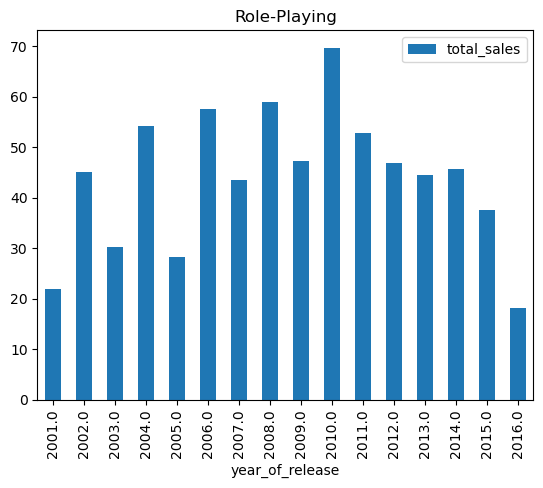

AxesSubplot(0.125,0.11;0.775x0.77)


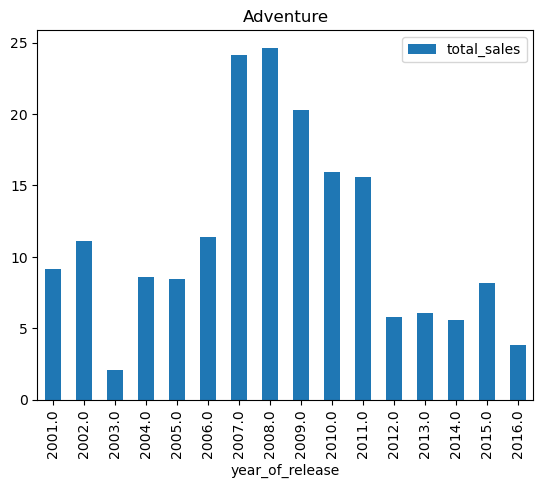

AxesSubplot(0.125,0.11;0.775x0.77)


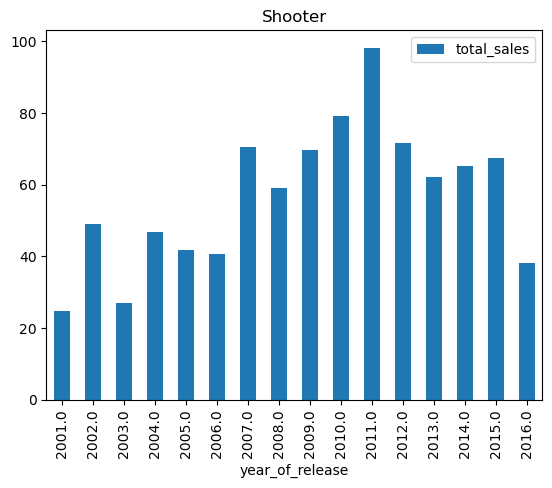

AxesSubplot(0.125,0.11;0.775x0.77)


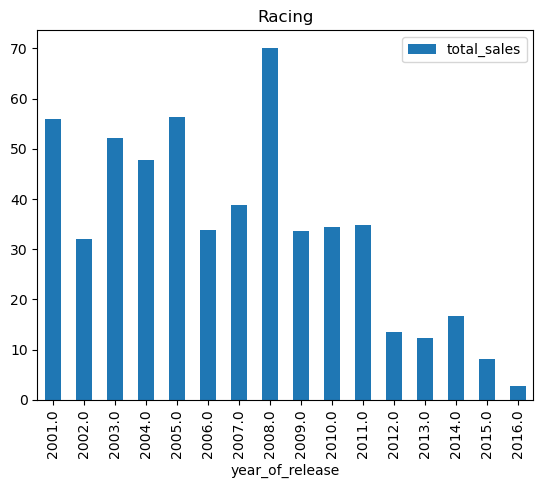

AxesSubplot(0.125,0.11;0.775x0.77)


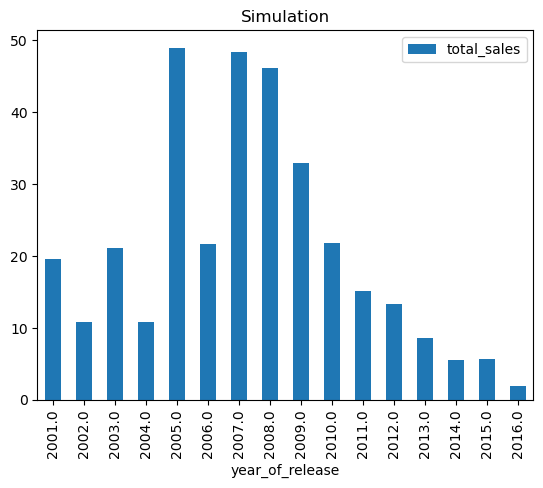

AxesSubplot(0.125,0.11;0.775x0.77)


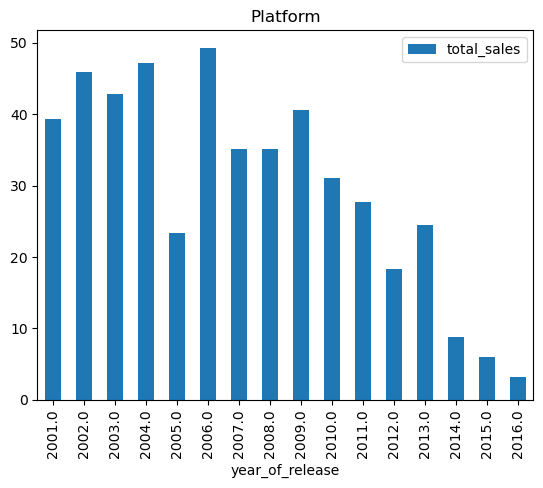

AxesSubplot(0.125,0.11;0.775x0.77)


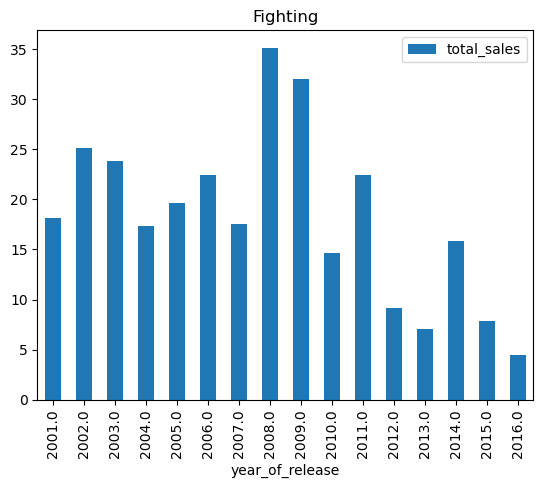

AxesSubplot(0.125,0.11;0.775x0.77)


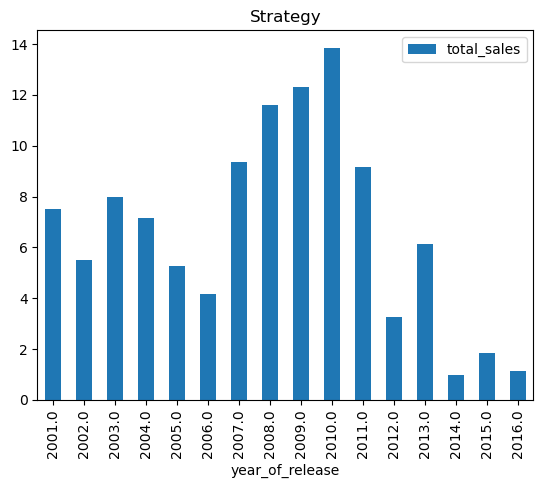

AxesSubplot(0.125,0.11;0.775x0.77)


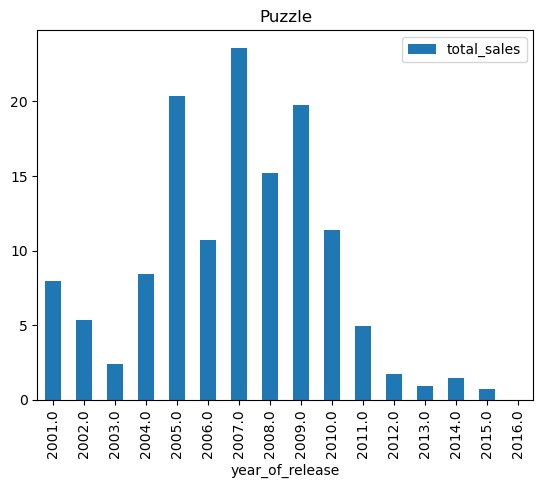

In [148]:
distr_by_year_sales(games_new,genres)

- We see that Action games had always good sales growing from 2007 till 2014
- Sports games had sales on approximately same levelwith tow peaks in 2006 and 2009
- After 2011 sales of sports games increased in comparison with previous period of time
- Graph of total sales by years for Misc genre looks normally distributed with peaks from 2007 till 2010
- Role-Paying games have rises and falls from 2001 till 2010, but after 2011 the sales started to decrease slowly for this genre
- Graph for Adventure genre looks normally distributed with peak from 2007 till 2011
- Total Sales of Shooter games grew towards the 2011, after that period sales strated to decrease
- Racing games have stable sales till 2011 with some peaks but after 2011 the sales have fallen
- Graph for Simulation genre also looks normally distributed with some outliers (like in 2005)
- Sales from Platform games decreased from from 2006 till 2016, while in 2001-2004 they have stable sales
- Fighting games have peak of sales in 2008-2009, but overall sales are increasing
- Strategy games from 2007 till 2012 look normally distributed
- Puzzle games also look normally distributed with some outliers in 2001-2003

### Conclusion

**I can make following conclusions after analyzing the dataset:**
    
- PS2 platform has the biggest sales among all platforms and biggest number of games was published on this platform.
- The next platforms by value of total sales - X360, PS3, Wii, DS and PS.
- The lowest sales were on SCD, NG, WS, TG16, 3DO, GG and PCFX platforms.

- For stydying the distribution of sales by years for each platform I took platforms with total_sales more than 303.65 (4th quartile)
- Looking on the graphs I can conclude that almost all of them distributed normally, some of them skewed a bit.

**Platforms that used to be popular but now have zero sales** <br>
Among the platforms with the highest sales:
* The sales on PS platform stopped in 2004. Last sales were in 2003.
* The sales on GBA platform stopped in 2008. Last sales were in 2007.
* The sales on PS2 platform stopped in 2011.
* The lifecycle of DS platform lasted from 2004 till 2013. After 2013 the platform has no sales.


- The average lifecycle for platforms with the highest sales is 9,25 years.
- The average lifecycle for all platforms 7.71 years


- Most competitive period of time we have (among platforms with the highest sales) - from 2005 till 2015. In this period of time the biggest number of platforms was on the market at the same time.

**How long does it generally take for new platforms to appear and old ones to fade?**

- It usually took 1 year for the platform to appear
- The top sales lasted approximately 4 years
- After that period sales are starting to fall
- It took approximately 4 years for platform to stop the sales

**For PS platforms:** <br> 
- It tooks from 3 till 5 years till the sales on old platformes stopped after appearing the new ones. 
- New platforms win the market in 1-2 years after appearing.

**Determine what period you should take data for**

- I would take a data slice which contain games released after 2000.
- The number of games released before 2000 is relatively small.
- Data after 2000 year is normally distributed and good for analysis

**Which platforms are leading in sales?**
- PS2, X360, PS3, Wii and DS platforms have positive z score or in other words the total sales of these platforms is higher than the mean value.
- This are the most potentially profitable platforms. 
- The PS4 was very popular because even in a bad year the minimum profit of PS4 was higher than median profit for many other platforms (for example for Wii platform).

**Which ones are growing or shrinking in sales?**

* DS platform the had high sales in 2005
* After 2008 sales on DS platform were shrinking
* PS2 platfrom started shrinking in sales from 2005
* PS3 platfrom had good sales from 2006 till 2011
* PS3 platfrom had constant shrinking sales from 2014 year
* The best year for PS4 was 2014, 2013 and 2015
* The Wii platform had extremly high sales in 2006
* We see the good grow of sales of X360 platform from 2006 till 2008 and in 2010
* The XOne platform had one good year with grow in sales in 2014

**How user and professional reviews affect sales?**

- Correlation betwen 'user_score' and 'total_sales' is week and equal to 0.17
- Correlation betwen 'critic_score' and 'total_sales' is also not very strong and equal to 0.4
- On a scatter plot we see that users tend to buy games with user score above 6 or even 7.
- Vast part of sold games have user score above 7.
- On a scatter plot for critic_score and 'total_sales' columns we see that the most game sold have critic score from 60 till 80.

**Comparing of the sales of the same games on other platforms**

- Vast majority of games with top sales belongs to the Wii platform.
- The highest sales made the game Wii Sports, on the second place by total sales is Grand Theft Auto V, on the third place - Mario Kart Wii.
- Many games presented on only one platform.
- Grand Theft Auto V (the second popular game by total sales) made the highest sales on PS3, PS4 and X360 platforms.
- Call of Duty: Black Ops and Modern Warfare 3 games made the biggest sales on X360 and PS3 platforms
- The Minecraft had the highest sales on X360, PS3 and PS4 platforms.

**Distribution of games by genres**

- Overall conclusion for games of all genres I can made: the sales of the games were good from 2000 till 2010, after 2010 for almost all genres sales started to decrease
- Many genres have peaks of sales (and number games released) in period from 2007 till 2011
- Only Action games did not drastically decreased in number of games and in sales after 2011
- Second genre which also did not decreased in number of games and in sales - Shooter games
- The highest sales have the games of Action genre
- 2nd and 3rd genres by total sales are Sports and Shooters
- The lowest sales have the Strategy games

### Step 4. Create a user profile for each region

**For each region (NA, EU, JP), determine:**
- **The top five platforms. Describe variations in their market shares from region to region.**
- **The top five genres. Explain the difference.**
- **Do ESRB ratings affect sales in individual regions?**

Let's find **the top five platforms for each region**

In [149]:
#let's find top 5 platforms for North America
na_pl = games_new.pivot_table(index=['platform'],values='na_sales',aggfunc='sum',fill_value=0)

#sort them in descending order
na_pl.sort_values(by='na_sales',ascending=False,inplace=True)

#let's find a market share for each platfrom
na_pl['market_share_na'] = na_pl['na_sales'].transform(lambda x: x / x.sum())
na_pl.reset_index(inplace=True)
na_pl.head(5)

platform  na_sales  market_share_na
0     X360    599.15         0.172964
1      PS2    563.54         0.162684
2      Wii    494.01         0.142612
3      PS3    391.60         0.113048
4       DS    381.38         0.110098

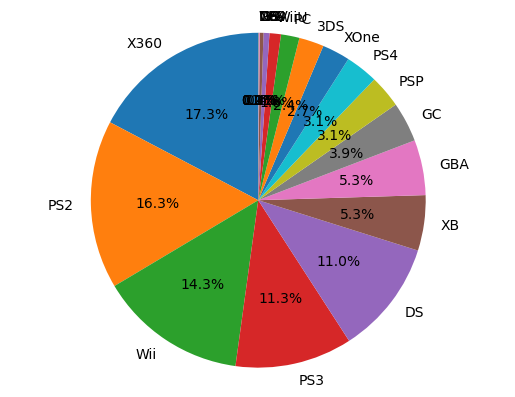

In [150]:
#let's plot a pie chart for our data
labels = na_pl['platform']
sizes = na_pl['market_share_na']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

**Top 5 platforms for North America by sales:**

- X360 with 17,29% of market
- PS2 with 16,26% of market
- Wii with 14,26% of market
- PS3 with 11,30% of market
- DS with 11% of market

In [151]:
#let's find top 5 platforms and their market shares for Europe
eu_pl = games_new.pivot_table(index=['platform'],values='eu_sales',aggfunc='sum',fill_value=0)
eu_pl.sort_values(by='eu_sales',ascending=False,inplace=True)
eu_pl['market_share_eu'] = eu_pl['eu_sales'].transform(lambda x: x / x.sum())
eu_pl.reset_index(inplace=True)
eu_pl.head(5)

platform  eu_sales  market_share_eu
0      PS3    328.49         0.160407
1      PS2    326.05         0.159216
2     X360    269.79         0.131743
3      Wii    261.48         0.127685
4       DS    188.72         0.092155

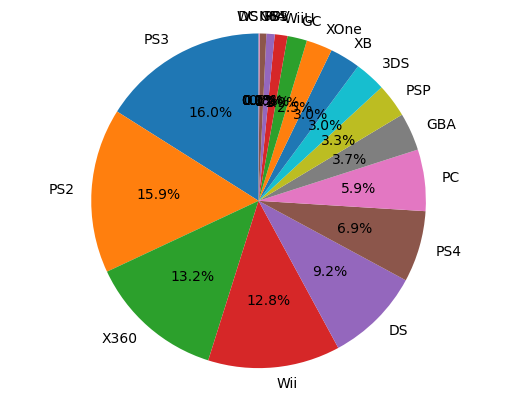

In [152]:
labels = eu_pl['platform']
sizes = eu_pl['market_share_eu']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

**Top 5 platforms for Europe by sales:**

- PS3 with 16,04% of market
- PS2 with 15,92% of market
- X360 with 13,17% of market
- Wii with 12,76% of market
- DS with 9,21% of market

In [153]:
#let's find top 5 platforms for Japan and their market shares 
jp_pl = games_new.pivot_table(index=['platform'],values='jp_sales',aggfunc='sum',fill_value=0)
jp_pl.sort_values(by='jp_sales',ascending=False,inplace=True)
jp_pl['market_share_jp'] = jp_pl['jp_sales'].transform(lambda x: x / x.sum())
jp_pl.reset_index(inplace=True)
jp_pl.head(5)

platform  jp_sales  market_share_jp
0       DS    175.00         0.225821
1      PS2    128.87         0.166295
2      3DS    100.62         0.129841
3      PS3     79.52         0.102613
4      PSP     76.38         0.098561

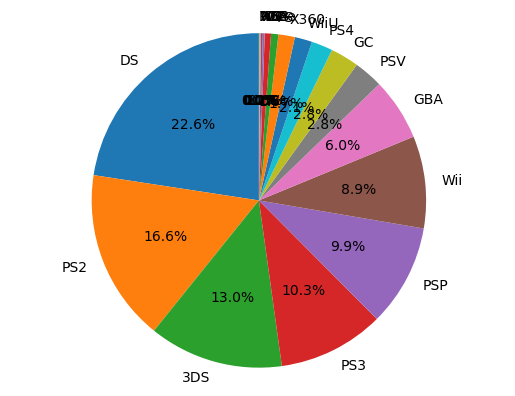

In [206]:
labels = jp_pl['platform']
sizes = jp_pl['market_share_jp']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

**Top 5 platforms for Japan by sales:**

- DS with 22,58% of market
- PS2 with 16,62% of market
- 3DS with 12,98% of market
- PS3 with 10,26% of market
- PSP with 9,85% of market

In [155]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#top 5 platfroms in North America
top5na = na_pl.head(5)
top5na['region']='NA'

#top 5 platfroms in Europe
top5europe = eu_pl.head(5)
top5europe['region']='EU'

#top 5 platfroms in Japan
top5japan = jp_pl.head(5)
top5japan['region']='JP'

#let's merge these tables into one
data_frames = [top5na,top5europe,top5japan]
top5 = reduce(lambda  left,right: pd.merge(left,right,on=['platform'],
                                            how='outer'), data_frames)
top5.fillna(0,inplace=True)

In [156]:
#top5 platforms in each region combined in one table
top5

platform  na_sales  market_share_na region_x  eu_sales  market_share_eu  \
0     X360    599.15         0.172964       NA    269.79         0.131743   
1      PS2    563.54         0.162684       NA    326.05         0.159216   
2      Wii    494.01         0.142612       NA    261.48         0.127685   
3      PS3    391.60         0.113048       NA    328.49         0.160407   
4       DS    381.38         0.110098       NA    188.72         0.092155   
5      3DS      0.00         0.000000        0      0.00         0.000000   
6      PSP      0.00         0.000000        0      0.00         0.000000   

  region_y  jp_sales  market_share_jp region  
0       EU      0.00         0.000000      0  
1       EU    128.87         0.166295     JP  
2       EU      0.00         0.000000      0  
3       EU     79.52         0.102613     JP  
4       EU    175.00         0.225821     JP  
5        0    100.62         0.129841     JP  
6        0     76.38         0.098561     JP

The top five platforms:

- North America - X360, PS2, Wii, PS3 and DS
- Europe - PS3, PS2, X360, Wii and DS
- Japan - DS, PS2, 3DS, PS3 and PSP

How differ market shares of these platforms in different regions: 

**X360**
- X360 made the highest sales in North America. This platform took 17,29% of the market there.
- In Europe this platform on a 3rd place by sales with 13,17% of the market. 
- In Japan this platform didn't get into top 5 platforms.

**PS2**
- This platform took the 2nd place by value of sales in each region.
- In North America it took 16,26% of the market
- In Europe it took 15,92% of the market
- In Japan it took 16,62% of the market

**Wii** 
- 3rd place by sales in North America - 14,26% of the market
- 4th place by sales in Europe - 12,76% of the market
- Didn't get into top 5 in Japan

**PS3**
- 4th place by sales in North America - 11,30% of the market
- 1st place by sales in Europe - 16,04% of the market
- 4th place by sales in Japan - 10,26% of the market

**DS**
- 5th place by sales in North America and Europe - 11% and 9,21% of the market accordingly
- 1st place by sales in Japan - 22,58% of the market

**3DS**
- Didn't get into top 5 in North America and Europe
- 3rd place by sales in Japan

**PSP**
- Didn't get into top 5 in North America and Europe
- 5th place by sales in Japan

Let's find now **the top five genres** for each region.

In [157]:
#let's find top 5 genres for North America and their market shares 
na_g = games_new.pivot_table(index=['genre'],values='na_sales',aggfunc='sum',fill_value=0)
na_g.sort_values(by='na_sales',ascending=False,inplace=True)
na_g['market_share_na'] = na_g['na_sales'].transform(lambda x: x / x.sum())
na_g.reset_index(inplace=True)
na_g.head(5)

genre  na_sales  market_share_na
0        Action    744.90         0.215039
1        Sports    577.13         0.166607
2       Shooter    494.39         0.142721
3          Misc    359.78         0.103862
4  Role-Playing    275.18         0.079439

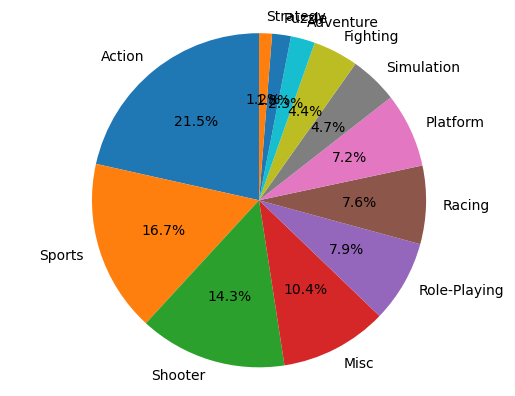

In [158]:
labels = na_g['genre']
sizes = na_g['market_share_na']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

**The top 5 genres in North America**

- Action with 21,5% of market share
- Sports with 16,66% of market share
- Shooter with 14,27% of market share
- Misc with 10,38% of market share
- Role-Playing with 7,94% of market share

In [159]:
#let's find top 5 genres for Europe and their market shares 
eu_g = games_new.pivot_table(index=['genre'],values='eu_sales',aggfunc='sum',fill_value=0)
eu_g.sort_values(by='eu_sales',ascending=False,inplace=True)
eu_g['market_share_eu'] = eu_g['eu_sales'].transform(lambda x: x / x.sum())
eu_g.reset_index(inplace=True)
eu_g.head(5)

genre  eu_sales  market_share_eu
0   Action    462.30         0.225749
1   Sports    334.08         0.163137
2  Shooter    294.15         0.143638
3     Misc    192.16         0.093835
4   Racing    186.50         0.091071

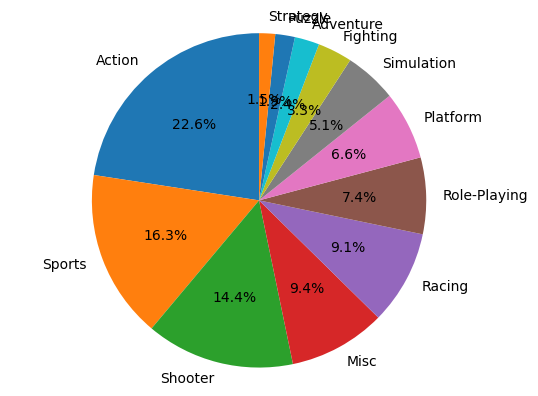

In [160]:
labels = eu_g['genre']
sizes = eu_g['market_share_eu']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

**The top 5 genres in Europe**

- Action with 21,57% of market share
- Sports with 16,31% of market share
- Shooter with 14,36% of market share
- Misc with 9,38% of market share
- Racing with 9,1% of market share

In [161]:
#let's find top 5 genres for Japan
jp_g = games_new.pivot_table(index=['genre'],values='jp_sales',aggfunc='sum',fill_value=0)
jp_g.sort_values(by='jp_sales',ascending=False,inplace=True)
jp_g['market_share_jp'] = jp_g['jp_sales'].transform(lambda x: x / x.sum())
jp_g.reset_index(inplace=True)
jp_g.head(5)

genre  jp_sales  market_share_jp
0  Role-Playing    226.40         0.292148
1        Action    128.50         0.165817
2          Misc     83.68         0.107981
3        Sports     69.84         0.090122
4      Platform     52.71         0.068017

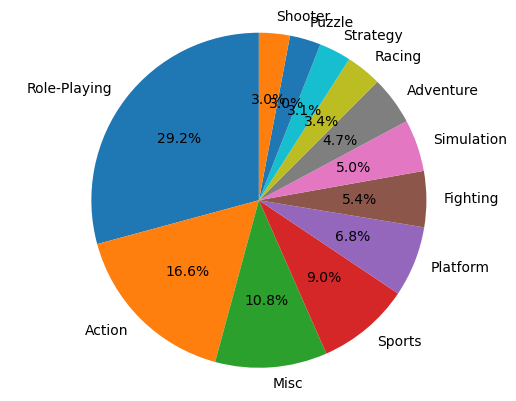

In [162]:
labels = jp_g['genre']
sizes = jp_g['market_share_jp']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

**The top 5 genres in Japan**

- Role-Playing with 29,21% of market share
- Action with 16,58% of market share
- Misc with 10,79% of market share
- Sports with 9,01% of market share
- Platform with 6,80% of market share

**We can conclude also:**

- Top genres and even their market shares for North America and Europe very similar.
- In Japan Shooter and Misc games (which are very popular in America and Europe) didn't get into top 5 genres. 
- On the other hand Role-Playing games are on the first place by popularity in Japan.

Let's determine the next:
**Do ESRB ratings affect sales in individual regions?**

Let's calculate the total sales and market shares for each rating in **North America**. Remember that we have rating column with NaNs and also with filled NaNs (NaNs filled with "no rating")

In [163]:
#let's find total sales for each rating in North America
na_r = games_new.pivot_table(index=['rating'],values='na_sales',aggfunc='sum',fill_value=0)
na_r.sort_values(by='na_sales',ascending=False,inplace=True)
na_r.head(5)

na_sales
rating          
E        1238.50
M         729.93
T         692.69
E10+      352.56
EC          1.53

In [164]:
#calculate the same for filled data
na_r_fill = games_new.pivot_table(index=['rating_filled'],values='na_sales',aggfunc='sum',fill_value=0)
na_r_fill.sort_values(by='na_sales',ascending=False,inplace=True)
na_r_fill.head(5)

na_sales
rating_filled          
E               1238.50
M                729.93
T                692.69
no rating        447.55
E10+             352.56

I filled the missing values in rating column with the "no rating". 
We can see the difference in two pivot tables. In the second table games with "no rating" on the 4th place by sales. If we would filled the NaNs for example with the most common value (E rating) - this is another approach to fill categorial NaNs. We would get in the second table much higher value for E games. 

So let's analyze only the original rating column with NaNs to get results more close to the reality.

In [165]:
#let's calculate the market shares of games of each rating
na_r['market_share'] = na_r['na_sales'].transform(lambda x: x / x.sum())
na_r.reset_index(inplace=True)
na_r.head(5)

rating  na_sales  market_share
0      E   1238.50      0.410579
1      M    729.93      0.241982
2      T    692.69      0.229636
3   E10+    352.56      0.116878
4     EC      1.53      0.000507

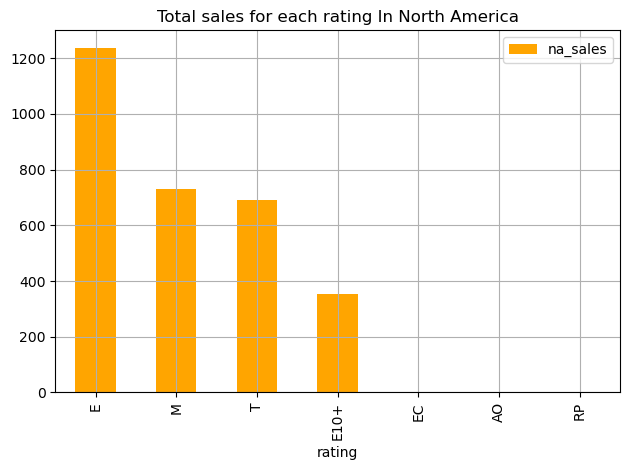

In [166]:
#let's plot it
na_r.plot(x='rating', y='na_sales', kind='bar',title='Total sales for each rating In North America',color='orange',grid=True)
plt.tight_layout()
plt.show()

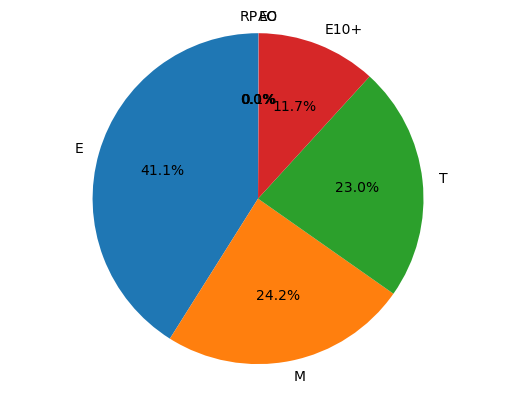

In [167]:
#and let's plot it on a pie chart
labels = na_r['rating']
sizes = na_r['market_share']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

What we can conclude for North America: 
- The highest sales made games with E rating. 
- Sales of E rating games took 41% of the market share.
- On the second place by sales games of M rating 24,2%
- Third place - games of T rating 23,0%

Let's calculate the same for **Europe** region.

In [168]:
eu_r = games_new.pivot_table(index=['rating'],values='eu_sales',aggfunc='sum',fill_value=0)
eu_r.sort_values(by='eu_sales',ascending=False,inplace=True)
eu_r['market_share'] = eu_r['eu_sales'].transform(lambda x: x / x.sum())
eu_r.reset_index(inplace=True)
eu_r.head(5)

rating  eu_sales  market_share
0      E    680.35      0.394710
1      M    473.83      0.274896
2      T    380.89      0.220976
3   E10+    187.84      0.108977
4     AO      0.61      0.000354

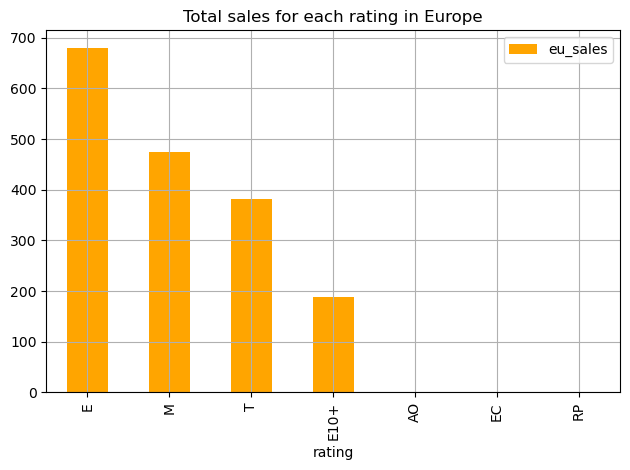

In [169]:
eu_r.plot(x='rating', y='eu_sales', kind='bar',title='Total sales for each rating in Europe',color='orange',grid=True)
plt.tight_layout()
plt.show()

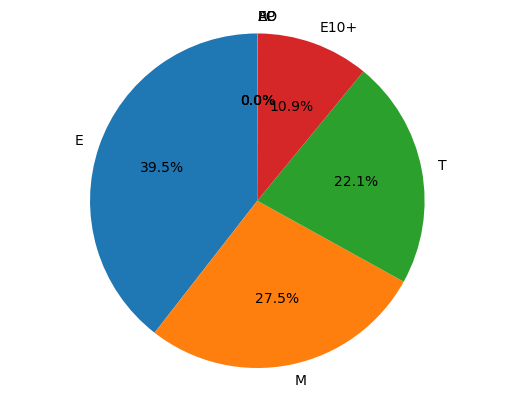

In [170]:
labels = eu_r['rating']
sizes = eu_r['market_share']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

For **Europe** I can conclude: 

- The highest sales also made games with E rating - 39,5%
- On the second place by sales also games of M category 27,5%
- Third place - games of T rating 22,1%
- Categories and the their shares almost the same for Europe and North America

In [171]:
jp_r = games_new.pivot_table(index=['rating'],values='jp_sales',aggfunc='sum',fill_value=0)
jp_r.sort_values(by='jp_sales',ascending=False,inplace=True)
jp_r['market_share'] = jp_r['jp_sales'].transform(lambda x: x / x.sum())
jp_r.reset_index(inplace=True)
jp_r.head(5)

rating  jp_sales  market_share
0      E    187.33      0.459672
1      T    122.81      0.301352
2      M     57.19      0.140333
3   E10+     40.20      0.098643
4     AO      0.00      0.000000

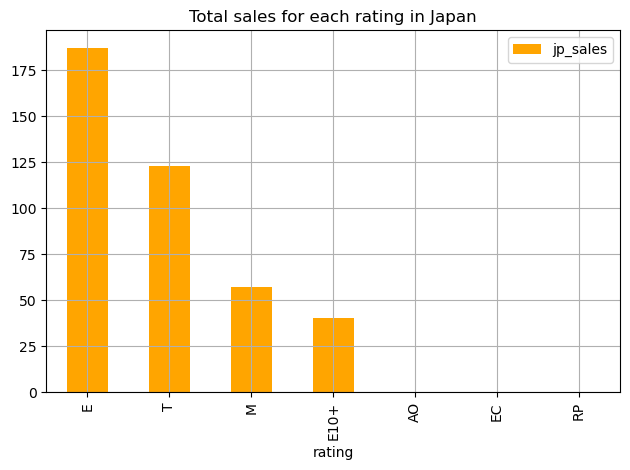

In [172]:
jp_r.plot(x='rating', y='jp_sales', kind='bar',title='Total sales for each rating in Japan',color='orange',grid=True)
plt.tight_layout()
plt.show()

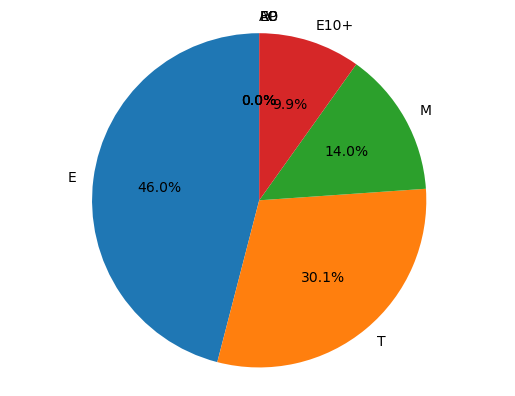

In [173]:
labels = jp_r['rating']
sizes = jp_r['market_share']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')
plt.show()

For Japan I can conclude:

- The highest sales like in North America and Europe made games with E rating - 46,0%
- Second category by popularity - T with 30,1%
- Third place - games of M rating with 14% of market share
- In Japan rating T and M by popularity switched the places in comparison with two other regions

In [174]:
#let's add region column
na_r['region']='NA'
eu_r['region']='EU'
jp_r['region']='JP'

#rename the columns keeping in mind that region of sales mention in 'region' column
na_r.rename(columns={'na_sales': 'sales'}, inplace=True)
eu_r.rename(columns={'eu_sales': 'sales'}, inplace=True)
jp_r.rename(columns={'jp_sales': 'sales'}, inplace=True)

In [175]:
#our dataframes
data_frames = [na_r,eu_r,jp_r]
#merge tables
result_concat = pd.concat(data_frames)
result_concat.fillna(0,inplace=True)

#in the result table we see rating column, sales, market share and region
result_concat

rating    sales  market_share region
0      E  1238.50      0.410579     NA
1      M   729.93      0.241982     NA
2      T   692.69      0.229636     NA
3   E10+   352.56      0.116878     NA
4     EC     1.53      0.000507     NA
5     AO     1.26      0.000418     NA
6     RP     0.00      0.000000     NA
0      E   680.35      0.394710     EU
1      M   473.83      0.274896     EU
2      T   380.89      0.220976     EU
3   E10+   187.84      0.108977     EU
4     AO     0.61      0.000354     EU
5     EC     0.11      0.000064     EU
6     RP     0.04      0.000023     EU
0      E   187.33      0.459672     JP
1      T   122.81      0.301352     JP
2      M    57.19      0.140333     JP
3   E10+    40.20      0.098643     JP
4     AO     0.00      0.000000     JP
5     EC     0.00      0.000000     JP
6     RP     0.00      0.000000     JP

In [176]:
#let's plot a grouped bar chart to see the rating in different regions
fig = px.bar(result_concat, x="rating", color="region",
             y='sales',
             title="A Grouped Bar Chart",
             barmode='group',
             height=600
            )

fig.show()

We see following from the grouped bar chart:
- North America have the biggest sales by absolute values
- Europe on the second place by sales by absolute values
- Japan have the smallest sales in comparison with other regions

- In all regions the most popular games with E rating
- The second rating by popularity in Europe and North America - M, in Japan - T.
- Most of sold games belongs to one of four ratings: E, M, T or E10+


Ratings decryption:

- E means "Everyone" - content that may be suitable for persons ages 6 and older
- T means "Teen" game have content that may be suitable for ages 13 and older.
- M means "Mature" have content that may be suitable for persons ages 17 and older.
- E10+ means "Everyone 10+" rating indicates the content is generally suitable for ages 10 and up
- EC means "Early Childhood" have content that may be suitable for persons ages 3 and older
- RP means "Rating Pending" have been submitted to the ESRB and are awaiting final rating. This symbol appears only in advertising prior to a game's release.
- AO are considered by the board to be suitable for players age 18 and over.

### Conclusion

**The top 5 platforms around the world:**
* North America - X360, PS2, Wii, PS3 and DS
* Europe - PS3, PS2, X360, Wii and DS
* Japan - DS, PS2, 3DS, PS3 and PSP

**How differ the market shares the top platforms around the world:**

| Platform | Result |
| :- |:------------- | 
| **X360** | the highest sales in North America | 
| **X360** | the 3rd place by sales in Europe |
| **X360** | didn't get into top 5 platforms in Japan | 
|  |   |
| **PS2** | the 2nd place by value of sales in each region |
|   |   |
| **Wii** | the 3rd place by sales in North America |
| **Wii** | the 4th place by sales in Europe |
| **Wii** | Didn't get into top 5 in Japan |
|   |   |
| **PS3**  | 4th place by sales in North America   |
| **PS3** | 1st place by sales in Europe  |
| **PS3** | 4th place by sales in Japan  |
|   |   |
| **DS** | 5th place by sales in North America and Europe  |
| **DS**  | 1st place by sales in Japan   |


**What genres are most popular in each region:**

* The most popular genres in North America are Action, Sports and Shooter
* The most popular genres in Europe also are Action, Sports and Shooter
* The most popular genres in Japan are Role-Playing, Action and Misc
 
 
* Top genres and even their market shares for North America and Europe very similar.
* In Japan Shooter and Misc games (which are very popular in America and Europe) didn't get into top 5 genres.
* On the other hand Role-Playing games are on the first place by popularity in Japan.


**How ESRB ratings affect sales in individual regions:**
- Games with E rating are the most popular with greatest sales around the world
- Most of sold games belongs to one of four ratings: E, M, T or E10+
- To sale the game successfully it's better if the game would have one of these four ratings

### Step 5. Test the following hypotheses:

— **Average user ratings of the Xbox One and PC platforms are the same.** <br>
— **Average user ratings for the Action and Sports genres are different.**

Set the alpha threshold value yourself.<br>

Explain:<br>
— How you formulated the null and alternative hypotheses<br>
— What significance level you chose to test the hypotheses, and why<br>

In [177]:
games_new['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'PS', 'PSV', 'GB', 'N64', 'DC', 'WS'],
      dtype=object)

In [178]:
#let's create a dataslice with data for Xbox One platform
XOne = games_new[games_new['platform']=='XOne']
XOne['user_score'].fillna(0,inplace=True)
len(XOne)

247

In [179]:
#let's create a dataslice with data for PC platform
PC = games_new[games_new['platform']=='PC']
PC['user_score'].fillna(0,inplace=True)
len(PC)

923

In [180]:
print('Dispersion user_score column for XOne',np.var(XOne['user_score']))
print('Dispersion user_score for PC',np.var(PC['user_score']))
print()
print('Dispersion user_score_filled for XOne',np.var(XOne['user_score_filled']))
print('Dispersion user_score_filled for PC',np.var(PC['user_score_filled']))

Dispersion user_score column for XOne 9.644061367994878
Dispersion user_score for PC 9.72361318842302

Dispersion user_score_filled for XOne 1.687386164336409
Dispersion user_score_filled for PC 1.9106366311955405


We see that dispersions of user score column for XOne and PC differs. But I can't conclude from this if they really differs or not.

Let's check if our data sets have equal variance before proceeding to the Student’s t-test.
To do that I will use Levene’s test of an equal variance.

**Further everywhere I will use the 1% critical statistical significance level as more strict.**

In [181]:
#let's call the Levene’s test function and enter the name of the samples
# our samples are XOne['user_score'] and PC['user_score'] columns
st.levene(XOne['user_score'], PC['user_score'], center='mean')

LeveneResult(statistic=0.8270440566778486, pvalue=0.3633162833853716)

In [182]:
#let's do the same for XOne['user_score_filled'] and XOne['user_score_filled'] columns
st.levene(XOne['user_score_filled'], PC['user_score_filled'], center='mean')

LeveneResult(statistic=0.13991649596720446, pvalue=0.7084319313823134)

We see that in both cases with 1% critical statistical significance level (in the second case even with 5% significance level) we should reject the null hypothesis that variances of these columns are equal:
- XOne['user_score'] and PC['user_score'] columns
- XOne['user_score_filled'] and XOne['user_score_filled'] columns

means we confirm with Levene’s test of an equal variance that the variances of these columns are different. So I should keep it in mind while doing the t-test (we should use equal_var = False parameter). 
<br>
<br>
Let's formulate zero hypothesis to test the statement that **Average user ratings of the Xbox One and PC platforms are the same**.

I will test data with NaNs and after that for data with filled NaNs.

The null hypothesis, H0, is a statement of “no effect” or “no difference” or mean values are equal. The alternative hypothesis tells that the average user ratings or mean values are not equal:

- **H0** - the average user rating of the Xbox One and the average user rating of PC platforms **are equal**
- **H1** - the average user ratings of the Xbox One and PC platforms **are not equal**

Let's apply the method scipy.stats.ttest_ind(array1, array2, equal_var) to test our hypothesis. 
 
Dispersions of user score column for XOne and PC differs. So because of that we should use **equal_var = False** parameter.

**First test** for original 'user_score' columns with NaN filled with 0 value (we can't do test on columns with NaN because p value will be nan for such columns):

In [183]:
alpha = .01 # critical statistical significance level
            # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        XOne['user_score'], 
        PC['user_score'],
        equal_var = False)

print('statistical significance level',alpha)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

statistical significance level 0.01
p-value:  0.00026452301851657924
We reject the null hypothesis


In the test above we get the result on 1% significance level that **we should reject** the null hypothesis that the average user ratings are equal, means they are different.

This is was the test where NaNs in the data was replaced with zero values.

Let's test the same for data 'user_score_filled' columns where NaNs were replaced by mean values.

In [184]:
alpha = .01 # critical statistical significance level
            # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        XOne['user_score_filled'], 
        PC['user_score_filled'],
        equal_var = False)

print('statistical significance level',alpha)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

statistical significance level 0.01
p-value:  0.00017636733807571372
We reject the null hypothesis


For columns with NaNs filled with mean values I also got the result that we should reject the null hypothesis that the average user ratings are equal. 

**I can conclude that with the 1% significance level we reject the null hypothesis that the average user ratings are equal and confirm that the average user ratings for XOne and PC platforms differs.** It means our main statement  "Average user ratings of the Xbox One and PC platforms are the same" is False.

Let's test now the second statement which says that **"Average user ratings for the Action and Sports genres are different"**.

In [185]:
#let's create a dataslice with Action games
Action = games_new[games_new['genre']=='Action']
Action['user_score'].fillna(0,inplace=True)
len(Action)

3069

In [186]:
#let's create a dataslice with Sports games
Sports = games_new[games_new['genre']=='Sports']
Sports['user_score'].fillna(0,inplace=True)
len(Sports)

1924

In [187]:
print('Dispersion user_score column for Action games',np.var(Action['user_score']))
print('Dispersion user_score for Sports games',np.var(Sports['user_score']))
print()
print('Dispersion user_score_filled for Action games',np.var(Action['user_score_filled']))
print('Dispersion user_score_filled for Sports games',np.var(Sports['user_score_filled']))

Dispersion user_score column for Action games 13.235732256078904
Dispersion user_score for Sports games 13.340790223395583

Dispersion user_score_filled for Action games 1.3755038542584186
Dispersion user_score_filled for Sports games 1.8009496332912938


Let's check if variances of Action and Sports games differs. Let's check it with  Levene’s test of an equal variance on 1% critical statistical significance level.

In [188]:
#let's call the Levene’s test function for Action['user_score'] and Sports['user_score'] columns

st.levene(Action['user_score'], Sports['user_score'], center='mean')

LeveneResult(statistic=0.2159489703713383, pvalue=0.6421643597927551)

In [189]:
#let's do the same for Action['user_score_filled'] and Sports['user_score_filled'] columns

st.levene(Action['user_score_filled'], Sports['user_score_filled'], center='mean')

LeveneResult(statistic=30.244225174874146, pvalue=3.9989989529160914e-08)

We confirmed with Levene’s test that variances of Action and Sports games differs - in both Levene’s tests we got p-value greater than 0.01 even greater than 0.05.

Let's formulate zero and alternative hypotheses. 

**We test the statement that Average user ratings of Action games and Sports games are different.**

Like in previous tests I will test data with NaNs filled with zero value and after that for data with NaNs filled with average value.

The null hypothesis, H0, is a statement of “no effect” or “no difference” or mean values are equal. The alternative hypothesis tells that the average user ratings or mean values are not equal:

- **H0 - the average user rating of the Action games and the average user rating of Sports games are equal**
- **H1 - the average user ratings of the Action games and Sports games are not equal**

Again I will apply the method scipy.stats.ttest_ind(array1, array2, equal_var) to test hypotheses.

Such as variations of user score column of Action games and Sports games differs (this fact was set by the Levene’s test above) I will use equal_var = False parameter. 

I will choose the 1% critical statistical significance level as more strict.

First test for original 'user_score' columns with NaN filled with 0 value:

In [190]:
alpha = .01 # critical statistical significance level
            # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        Action['user_score'], 
        Sports['user_score'],
        equal_var = False)

print('statistical significance level',alpha)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

statistical significance level 0.01
p-value:  0.06303194381162454
We can't reject the null hypothesis


In [191]:
#Let's test the same for data 'user_score_filled' columns where NaNs were replaced by mean values.

alpha = .01 # critical statistical significance level
            # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        Action['user_score_filled'], 
        Sports['user_score_filled'],
        equal_var = False)

print('statistical significance level',alpha)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

statistical significance level 0.01
p-value:  0.07230578009616222
We can't reject the null hypothesis


In both tests:
- first one was for data with NaNs filled with zero values
- second one was for data with NaNs filled with mean value 

we got the result that we can't reject the null hypothesis means: 

**We confirm with 1% significance level that the average user rating of the Action games and the average user rating of Sports games are equal. It means our statement that "Average user ratings of Action games and Sports games are different" is False.**

### Conclusion

I tested following statements:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

For the testing the statements I formulated the null and alternative hypothesis for each statement. For the first statement I formulated following hypotheses:

The null hypothesis, H0, is a statement of “no effect” or “no difference” or mean values are equal. The alternative hypothesis tells that the average profits or mean values are not equal:

- H0 - the average user rating of the Xbox One and the average user rating of PC platforms **are equal**
- H1 - the average user ratings of the Xbox One and PC platforms **are not equal**

For the second statement I formulated following hypotheses:

- H0 - the average user rating of the Action games and the average user rating of Sports games **are equal**
- H1 - the average user ratings of the Action games and Sports games **are not equal**

For the testing the hypotheses I used the scipy.stats.ttest_ind(array1, array2, equal_var) method.

Before the t-test I made Levene’s test for each pair of data to test if the variances of data samples differs. I did it because one of assumptions for t-test says: "For two-sample t-tests, the sample observations have homoscedasticity or homogeneity of variance. In other words, the variances of the samples are equal". So to do t-test correctly we should now if the variances of data samples are equal or different. In all  Levene’s tests I got result of inequality of variances.

I tested original data with NaNs ('user_score'  columns) as well as 'user_score_filled' columns with NaNs replaced with mean value. In first case while testing  original 'user_score'  columns I replaced NaNs with zero values. In all cases I got the same results for test on data with NaNs replced  with zero values and with mean values.

I can make following conclusions from the statistical tests:

- **With the 1% significance level we reject the null hypothesis that the average user ratings are equal and confirm the statement that the average user ratings for XOne and PC platforms differs. Means our main statement that "Average user ratings of the Xbox One and PC platforms are the same" is False.**

- **I confirm with 1% significance level that the average user rating of the Action games and the average user rating of Sports games are equal. Means our main statement that "Average user ratings of Action games and Sports games are different" is False.**

### Step 6. Write a general conclusion

### Overall conclusion

We have dataset of sales of the video games of the online store Ice.

The dataset contained the missing values and require to process some columns. Here is some of preprocessing operations which I did with dataset: 
* I replaced the column names and made them lowercase
* I converted ‘year_of_release' and 'user_score' columns into different data types
* I calculated the total sales
* I replaced missing values in columns where it was required. I also kept the original columns with NaNs

For analyse of video games I took data slice with games released after 2000 because:
* The number of games released before 2000 is relatively small.
* Data after 2000 year is normally distributed and good for analysis

After studying and analyzing the data I can conclude: 

* PS2 platform has the biggest sales among all platforms and biggest number of games was published on this platform.
* The most popular platforms with the highest sales are: PS2, X360, PS3, Wii, DS and PS.
* Data for PS2 platform is distributed normally, for many platforms data also distributed normally for some of them data skewed a bit.
* Most competitive period of time we have (among platforms with the highest sales) - from 2005 till 2015. In this period of time the biggest number of platforms was on the market at the same time.
* The average lifecycle for all platforms 7.71 years
* The average lifecycle for platforms with the highest sales is 9,25 years.
* It usually took 1 year for the platform to appear and 4 years to stop the sales and fade
* I found that user scores and critic scores do not have correlation with total sales - correlation is weak, but users tend to buy games with user scores above 6 and critic scores in range 60-80
* The highest sales made the game Wii Sports, on the second place by total sales is Grand Theft Auto V, on the third place - Mario Kart Wii.
* Many games with highest sales presented on only one platform.
* The highest sales have the games of Action genre
* The lowest sales have the Strategy games


The top 5 platforms around the world:
* North America - X360, PS2, Wii, PS3 and DS
* Europe - PS3, PS2, X360, Wii and DS
* Japan - DS, PS2, 3DS, PS3 and PSP


What genres are most popular in each region:
* The most popular genres in North America are Action, Sports and Shooter
* The most popular genres in Europe also are Action, Sports and Shooter
* The most popular genres in Japan are Role-Playing, Action and Misc


* Top genres and even their market shares for North America and Europe very similar.


* Games with E rating are the most popular with greatest sales around the world
* Most of sold games belongs to one of four ratings: E, M, T or E10+
* To sale the game successfully it's better if the game would have one of these four ratings

I tested following statements with t-test and got the following results:

**Statement:** "Average user ratings of the Xbox One and PC platforms are the same. <br>
**Result:** With the 1% significance level I confirmed the statement that the average user ratings for XOne and PC platforms **differs**. Means our main statement is False.


**Statement:** Average user ratings for the Action and Sports genres are different.<br>
**Result:** With the 1% significance level I confirmed the statement that the average user rating of the Action games and the average user rating of Sports games **are equal**. Means our main statement that is False.
